In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_validate

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#Carregamento dos dados
dados = 'dataset-uci.xlsx'
xls = pd.ExcelFile(dados)
print(xls.sheet_names)

['dataset']


In [4]:
try:
    df = pd.read_excel(dados)
except FileNotFoundError:
    print("Erro: O arquivo 'dataset-uci.xlsx' não foi encontrado.")

print("\nDimensões do dataset (linhas, colunas):", df.shape)
print("\nAs 5 primeiras linhas do dataset:")
display(df.head())
print("\nInformações sobre os tipos de dados e valores nulos:")
df.info()


Dimensões do dataset (linhas, colunas): (319, 39)

As 5 primeiras linhas do dataset:


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6



Informações sobre os tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    in

In [5]:
#Tratamento de dados ausentes
if 'df' in locals():
    print("Contagem de valores nulos por coluna:")
    print(df.isnull().sum())
print(f'Quantidade de valores nulos no dataset:{df.isnull().sum().sum()}')

# Verificacao de Duplicatas
print(f'Numero de duplicatas: {df.duplicated().sum()}')

Contagem de valores nulos por coluna:
Gallstone Status                                  0
Age                                               0
Gender                                            0
Comorbidity                                       0
Coronary Artery Disease (CAD)                     0
Hypothyroidism                                    0
Hyperlipidemia                                    0
Diabetes Mellitus (DM)                            0
Height                                            0
Weight                                            0
Body Mass Index (BMI)                             0
Total Body Water (TBW)                            0
Extracellular Water (ECW)                         0
Intracellular Water (ICW)                         0
Extracellular Fluid/Total Body Water (ECF/TBW)    0
Total Body Fat Ratio (TBFR) (%)                   0
Lean Mass (LM) (%)                                0
Body Protein Content (Protein) (%)                0
Visceral Fat Rating (VFR) 

In [6]:
# Pasta para salvamento das imagens geradas
!mkdir figures
dir_figures = './figures/'

if not os.path.exists(dir_figures):
    os.makedirs(dir_figures)


mkdir: cannot create directory ‘figures’: File exists


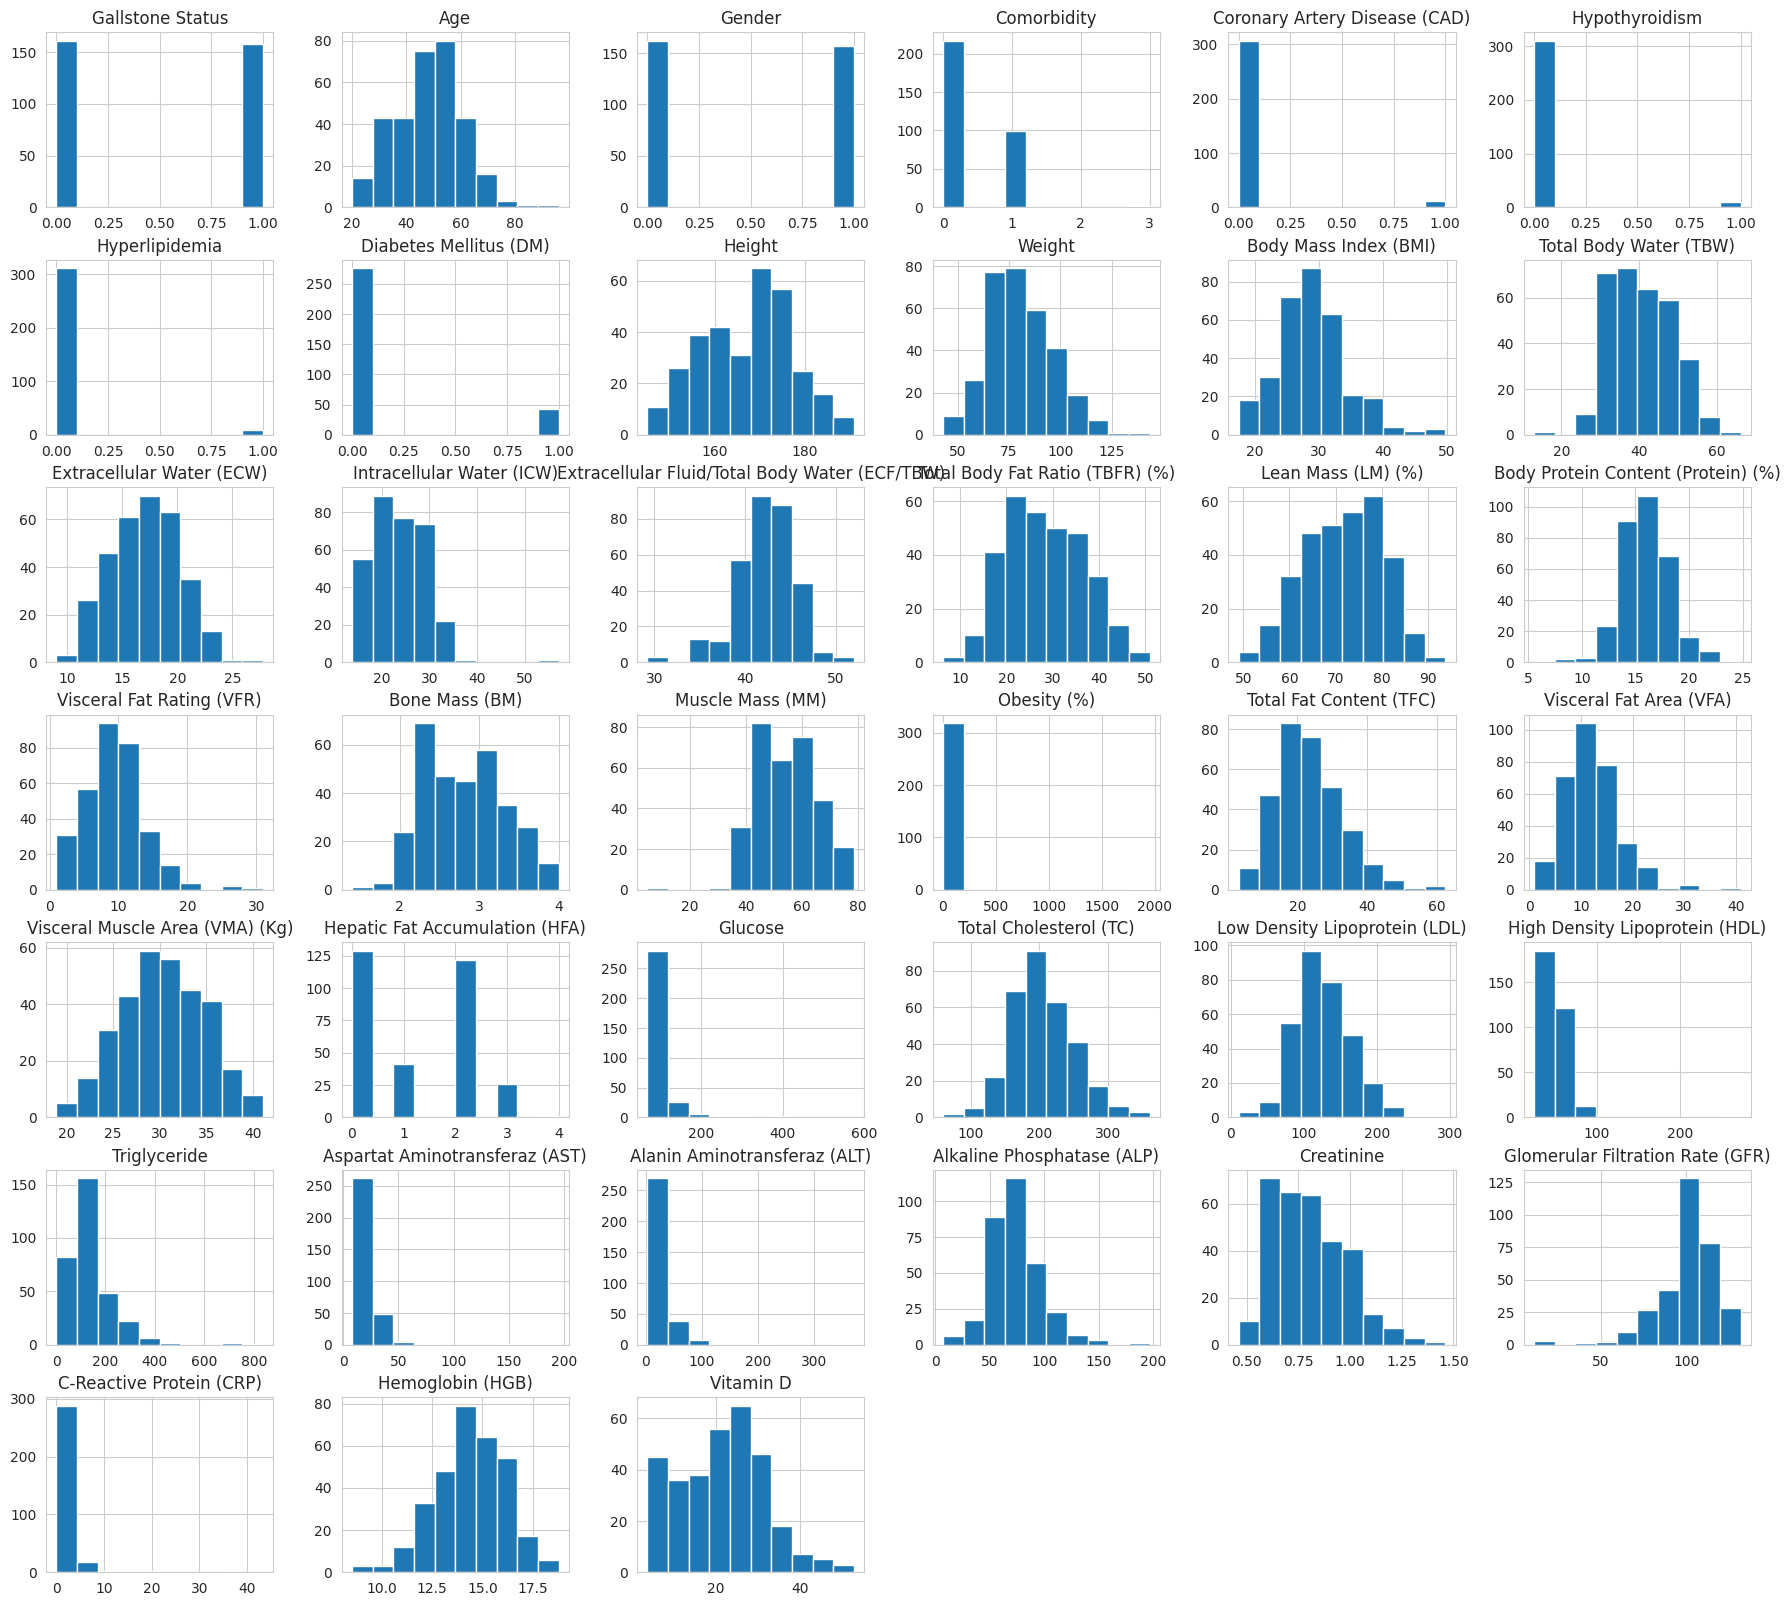

In [7]:
# @title Histogramas
df.hist(figsize=(22, 20))
plt.savefig(f'{dir_figures}/histogram_features.png', bbox_inches='tight', dpi=300)
plt.show()

In [8]:
# Colunas
colunas = df.columns.tolist()
print(colunas)

['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


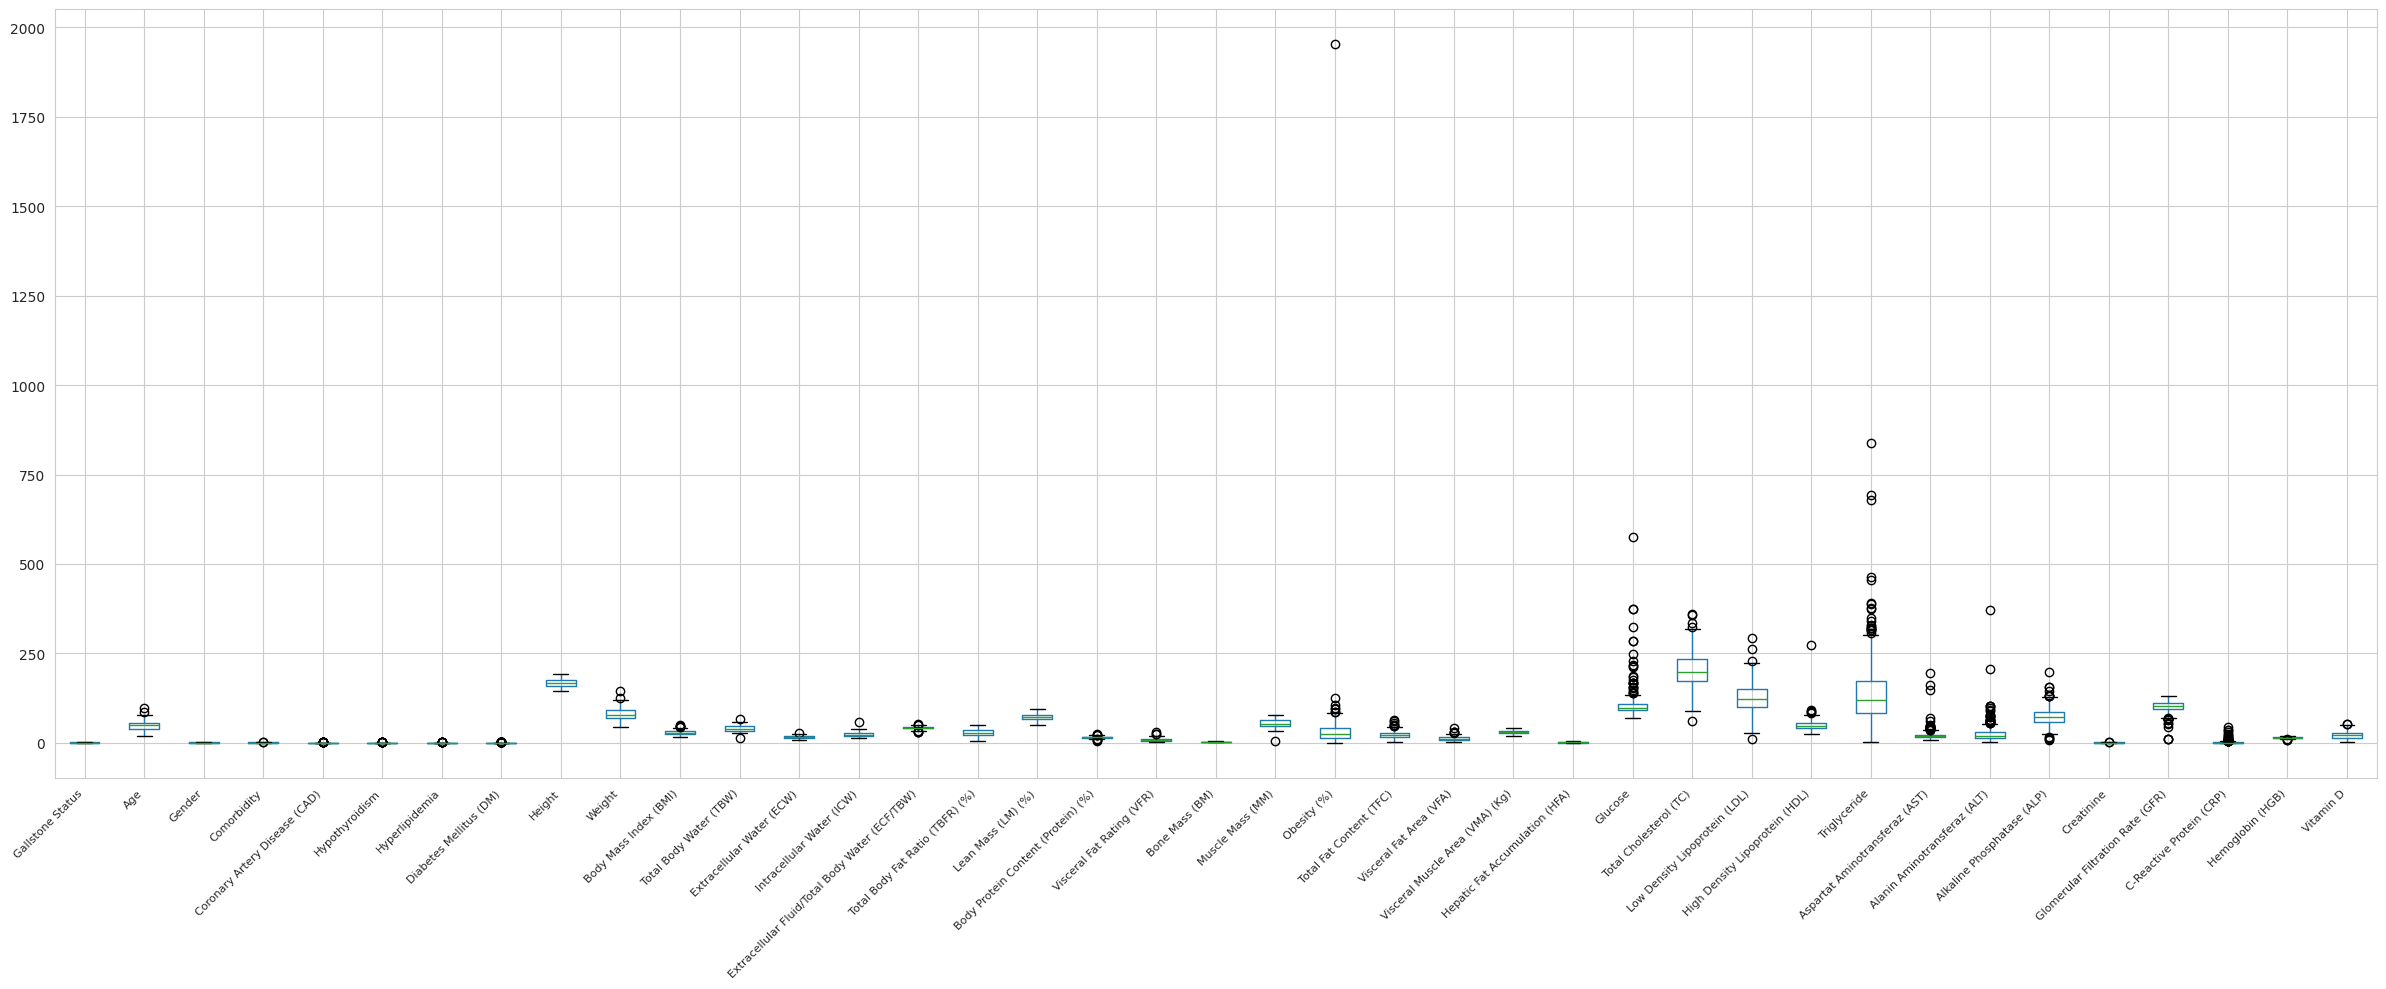

In [9]:
# @title Bloxplots
plt.figure(figsize=(24, 10))
df.boxplot()
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f'{dir_figures}/all_bloxplots.png', bbox_inches='tight', dpi=300)
plt.show()

In [10]:
# @title Exclusão das colunas desbalanceadas
# Criar novo df com algumas colunas excluídas do dataframe
df_exclude_columns = df.drop(columns=['Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)',
                           'Obesity (%)', 'Hepatic Fat Accumulation (HFA)', 'Glucose',
                           'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)',
                           'C-Reactive Protein (CRP)'])

print(df_exclude_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Height                                          319 non-null    int64  
 4   Weight                                          319 non-null    float64
 5   Body Mass Index (BMI)                           319 non-null    float64
 6   Total Body Water (TBW)                          319 non-null    float64
 7   Extracellular Water (ECW)                       319 non-null    float64
 8   Intracellular Water (ICW)                       319 non-null    float64
 9   Extracellular Fluid/Total Body Water (ECF/T

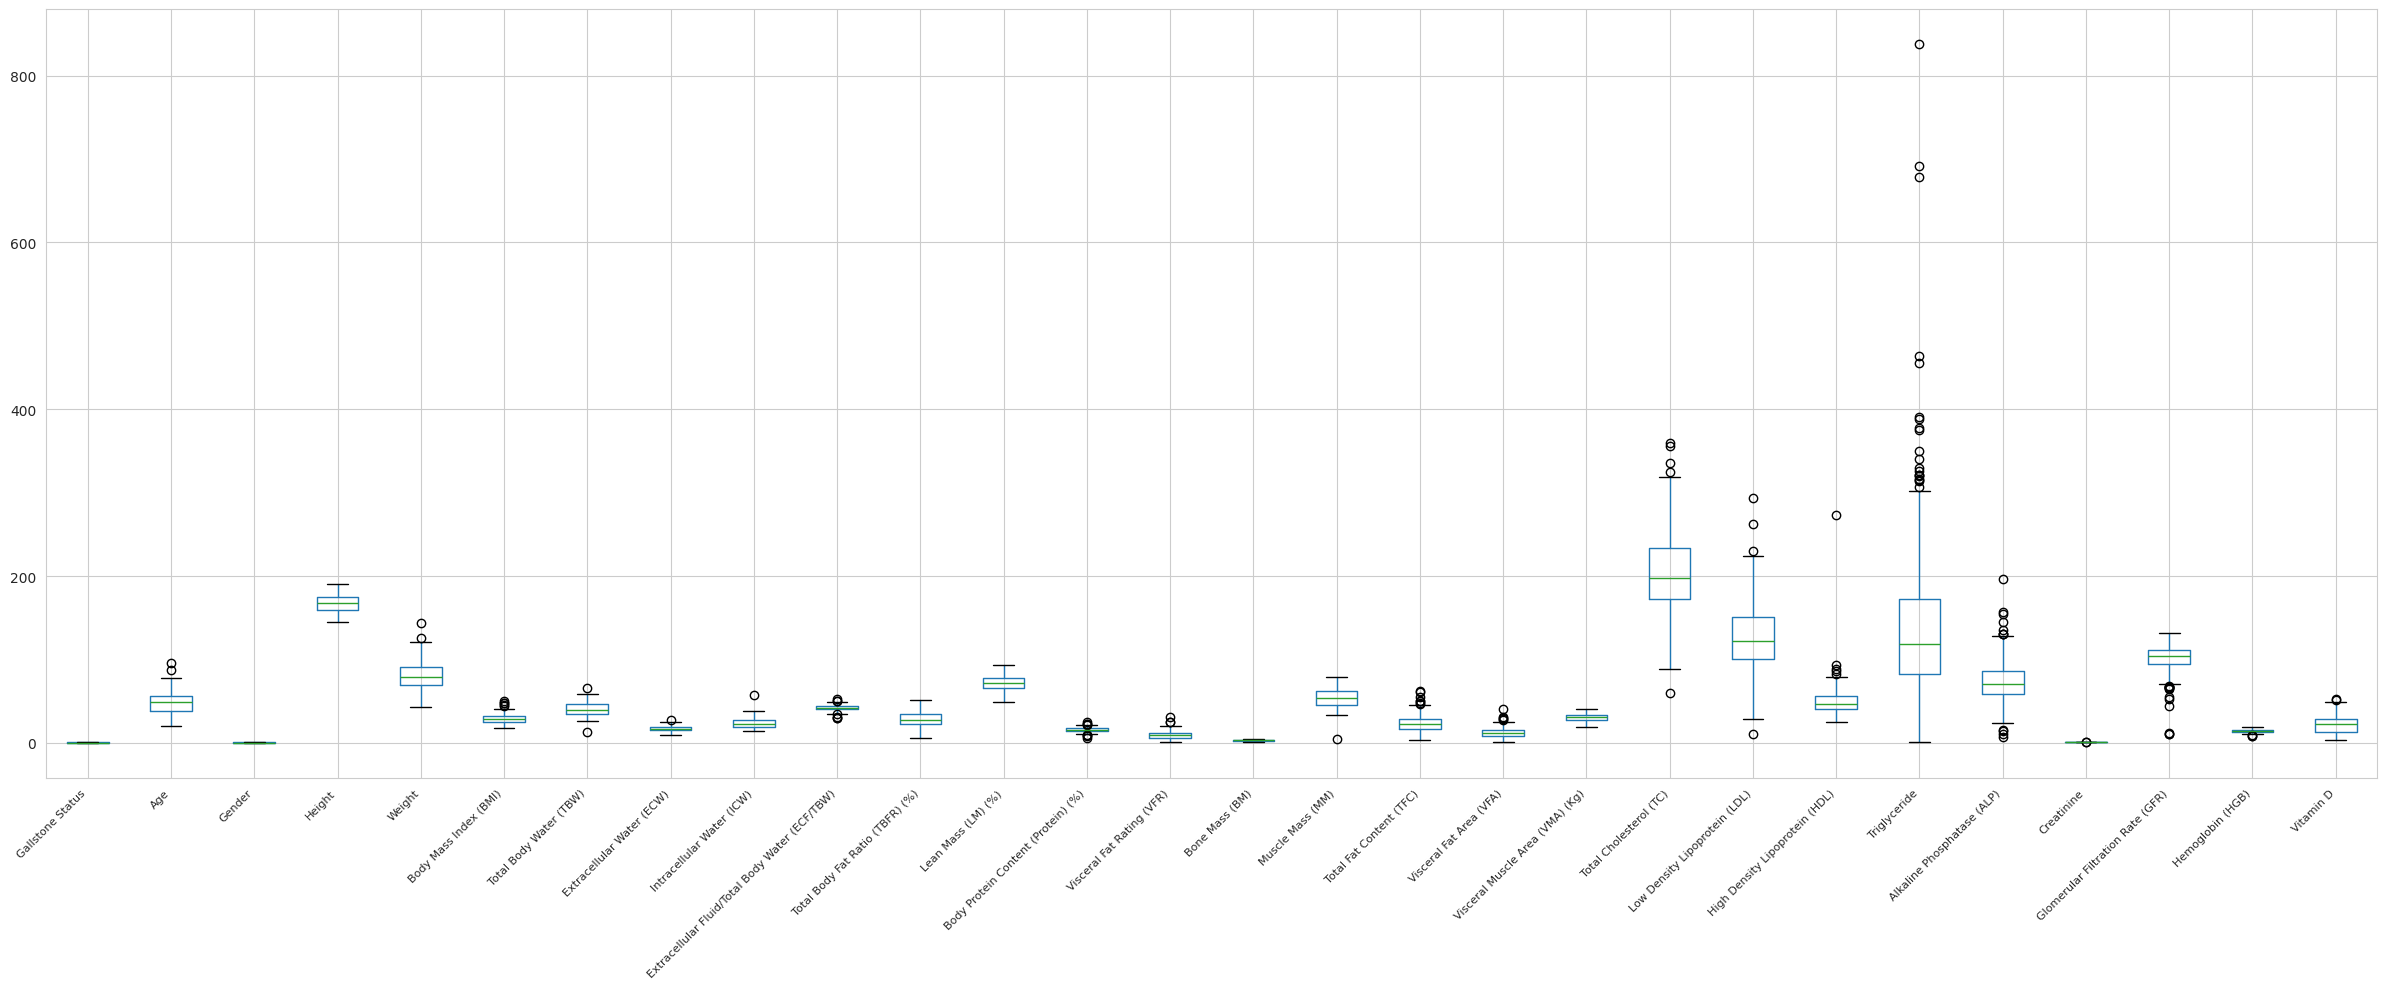

In [11]:
# @title Bloxplots df_novo
plt.figure(figsize=(24, 10))
df_exclude_columns.boxplot()
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f'{dir_figures}/all_bloxplots_columns_remove.png', bbox_inches='tight', dpi=300)
plt.show()

# IQR

---
---


In [12]:
def remove_outliers(df, features):
    """
    Remove missing values and outliers from specified features in a DataFrame using IQR method.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing the features
    features (list): List of feature names to process

    Returns:
    pandas.DataFrame: DataFrame with outliers removed for specified features
    """
    df_exclude_columns = df.copy()

    for feature_name in features:
        # Remove missing values
        feature = df_exclude_columns[feature_name].dropna()

        # Calculate Q1, Q3, and IQR
        Q1 = feature.quantile(0.25)
        Q3 = feature.quantile(0.75)
        IQR = Q3 - Q1

        # Calculate outlier boundaries
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Remove outliers
        df_exclude_columns = df_exclude_columns[
            (df_exclude_columns[feature_name] >= limite_inferior) &
            (df_exclude_columns[feature_name] <= limite_superior)
            # (df_clean[feature_name].isna())
        ]

    return df_exclude_columns

# List of features to process
# Fazer para todas as features
# features = [
#     'C-Reactive Protein (CRP)',
#     'Glomerular Filtration Rate (GFR)',
#     'Alkaline Phosphatase (ALP)',
#     'Alanin Aminotransferaz (ALT)',
#     'Aspartat Aminotransferaz (AST)',
#     'Triglyceride',
#     'High Density Lipoprotein (HDL)',
#     'Glucose'
# ]

In [13]:
def plot_feature_boxplots(feature_with_outliers, feature_without_outliers, feature_name):
    """
    Create side-by-side boxplots comparing feature data with and without outliers.

    Parameters:
    feature_with_outliers (pandas.Series): Feature data before outlier removal
    feature_without_outliers (pandas.Series): Feature data after outlier removal
    feature_name (str): Name of the feature for plot titles
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot with outliers
    axes[0].boxplot(feature_with_outliers, vert=True)
    axes[0].set_title(f"Feature_{feature_name} com outliers")

    # Boxplot without outliers
    axes[1].boxplot(feature_without_outliers, vert=True)
    axes[1].set_title(f"Feature_{feature_name} sem outliers")

    plt.tight_layout()
    plt.show()

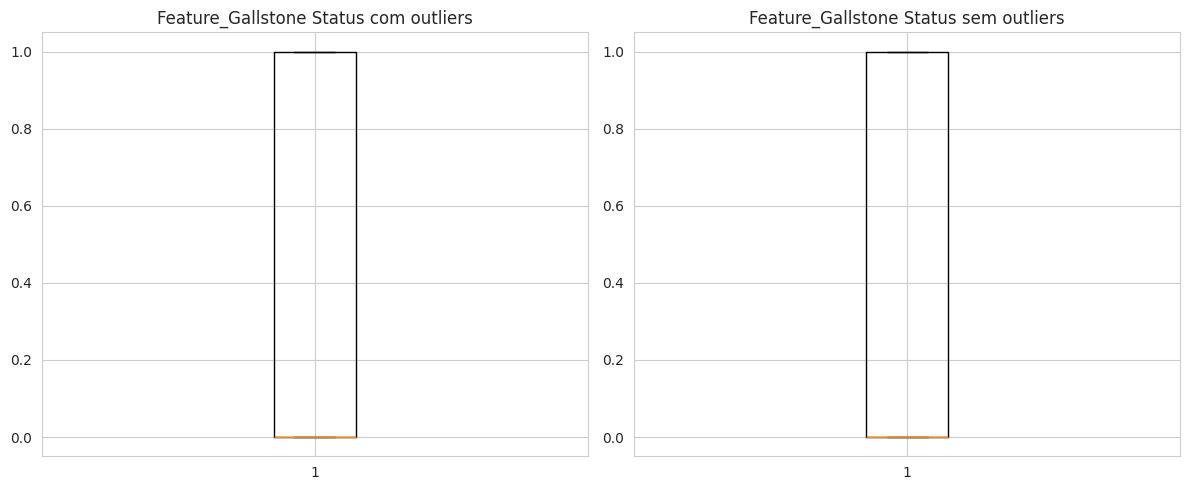

count    319.000000
mean       0.495298
std        0.500763
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gallstone Status, dtype: float64

count    319.000000
mean       0.495298
std        0.500763
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gallstone Status, dtype: float64

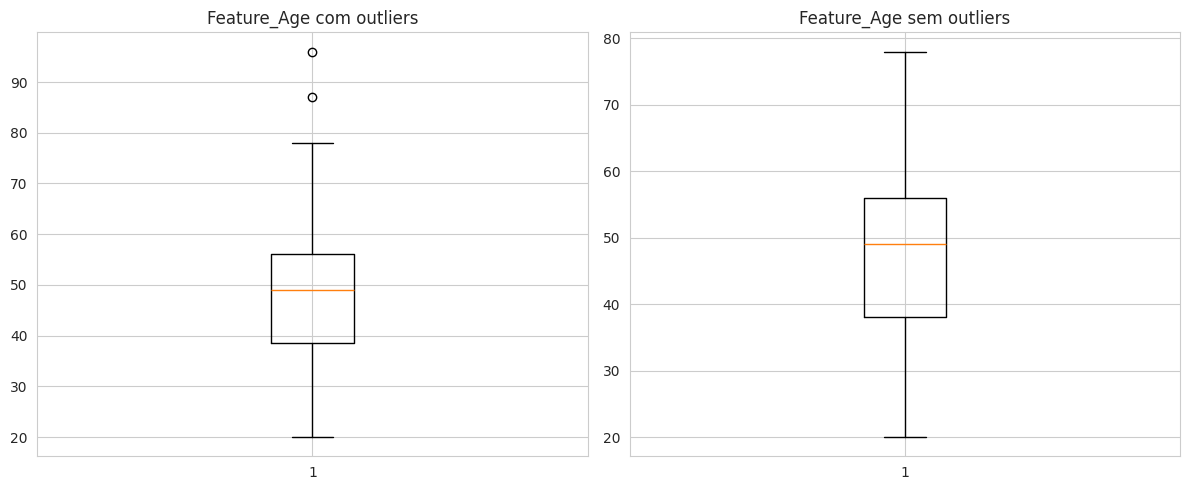

count    319.000000
mean      48.068966
std       12.114558
min       20.000000
25%       38.500000
50%       49.000000
75%       56.000000
max       96.000000
Name: Age, dtype: float64

count    317.000000
mean      47.794953
std       11.642577
min       20.000000
25%       38.000000
50%       49.000000
75%       56.000000
max       78.000000
Name: Age, dtype: float64

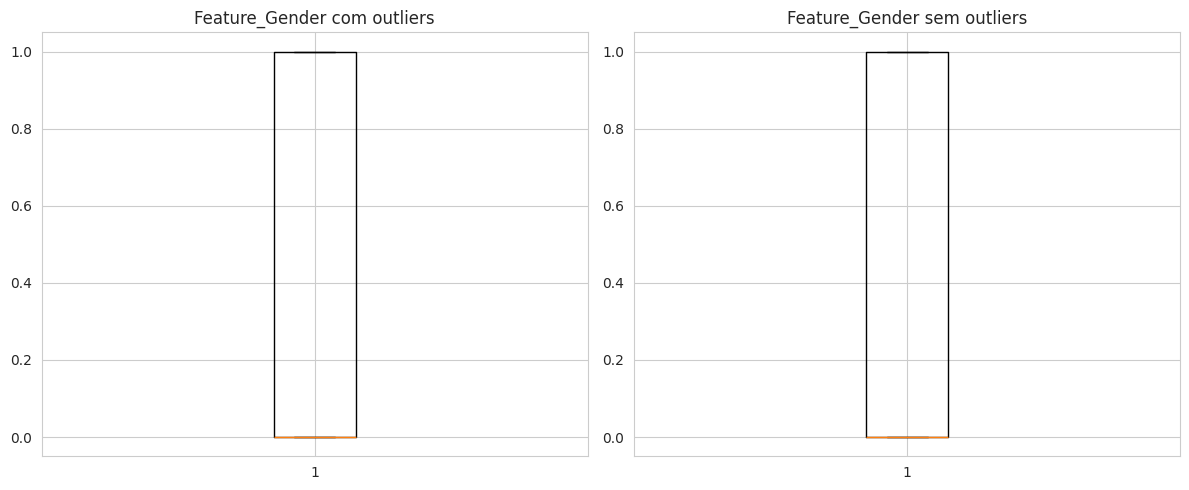

count    319.000000
mean       0.492163
std        0.500724
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64

count    317.000000
mean       0.495268
std        0.500768
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64

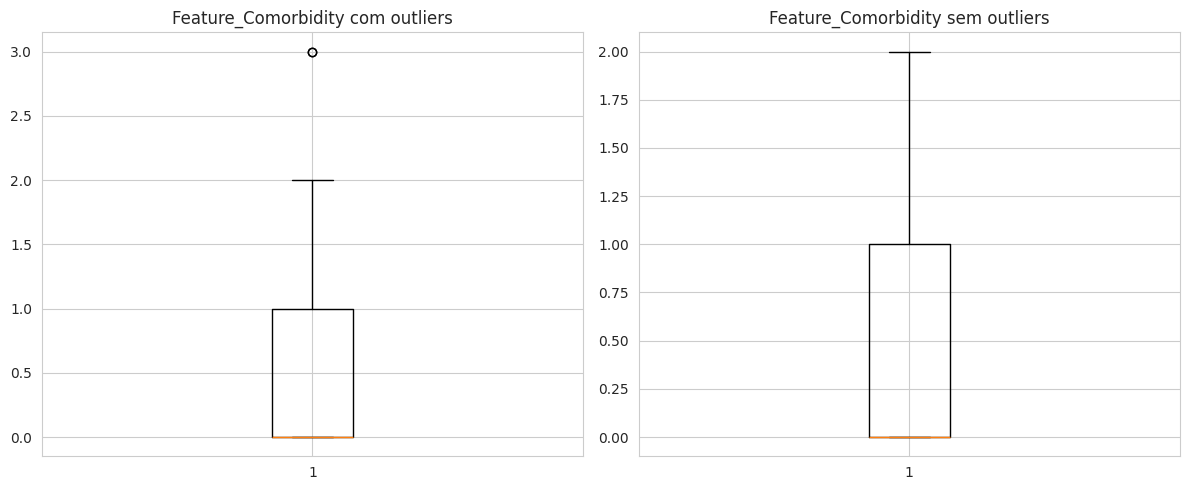

count    319.000000
mean       0.335423
std        0.517340
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Comorbidity, dtype: float64

count    315.00000
mean       0.31746
std        0.47301
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        2.00000
Name: Comorbidity, dtype: float64

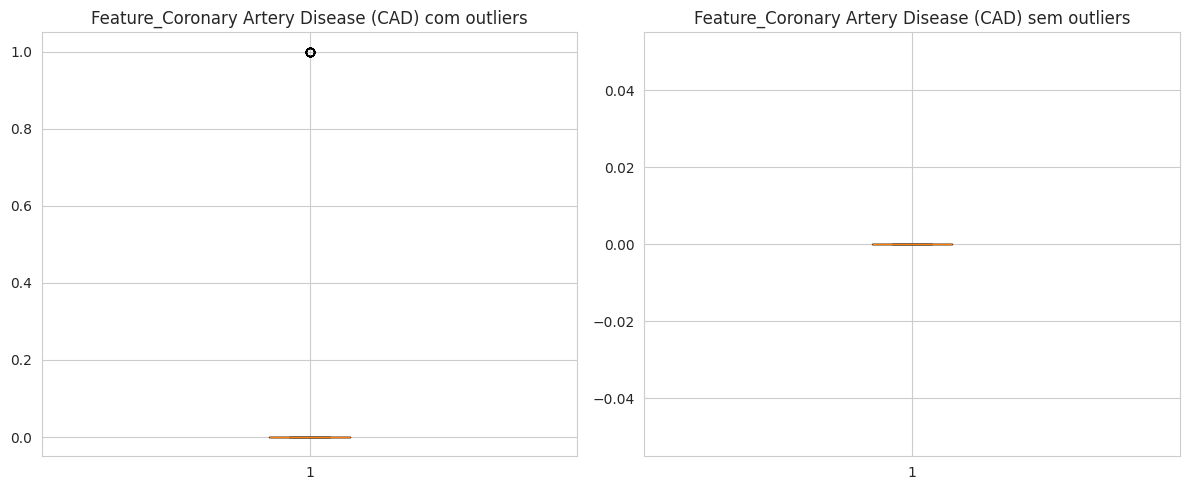

count    319.000000
mean       0.037618
std        0.190568
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Coronary Artery Disease (CAD), dtype: float64

count    306.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Coronary Artery Disease (CAD), dtype: float64

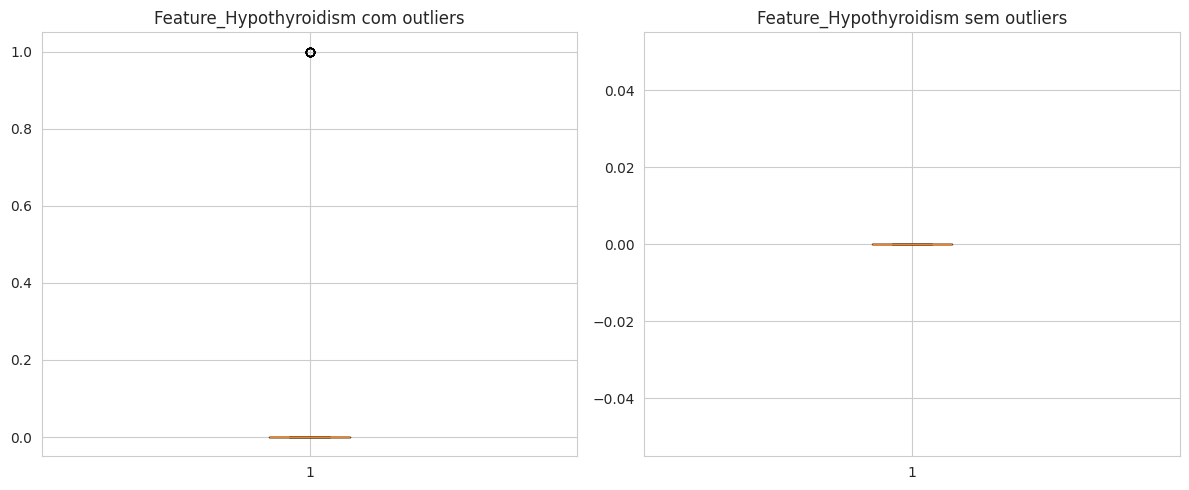

count    319.000000
mean       0.028213
std        0.165841
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Hypothyroidism, dtype: float64

count    297.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Hypothyroidism, dtype: float64

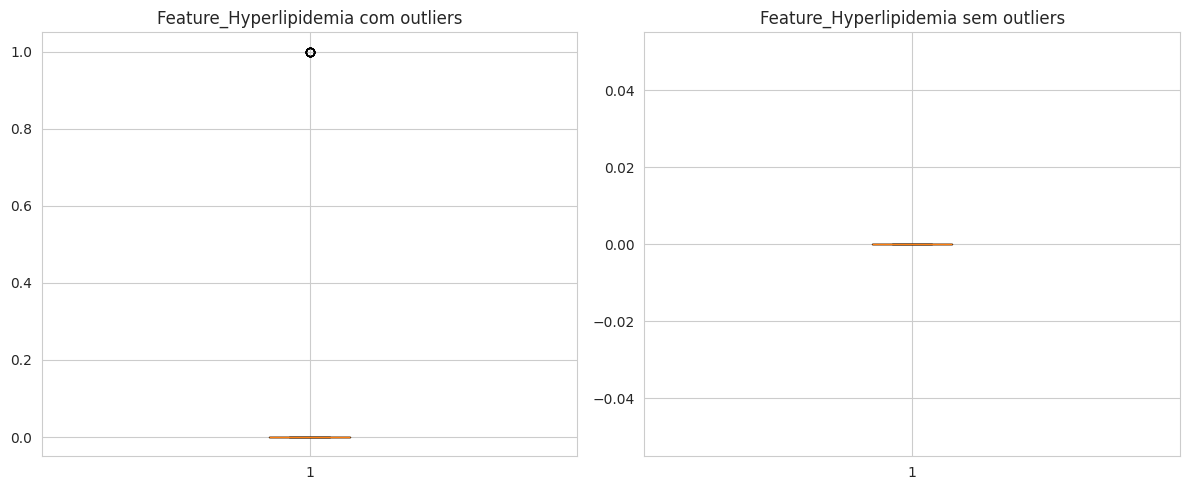

count    319.000000
mean       0.025078
std        0.156609
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Hyperlipidemia, dtype: float64

count    289.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Hyperlipidemia, dtype: float64

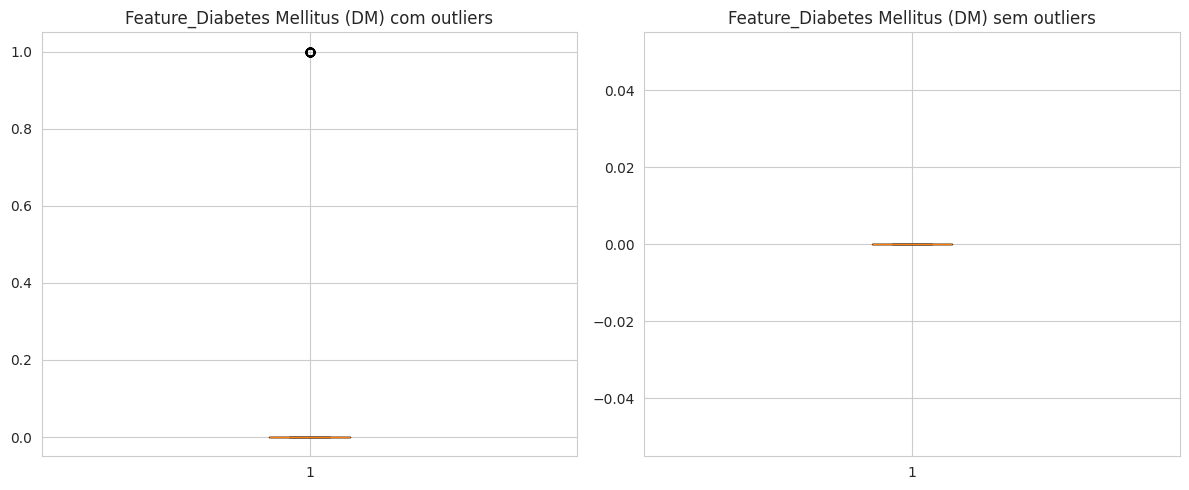

count    319.000000
mean       0.134796
std        0.342042
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Diabetes Mellitus (DM), dtype: float64

count    250.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Diabetes Mellitus (DM), dtype: float64

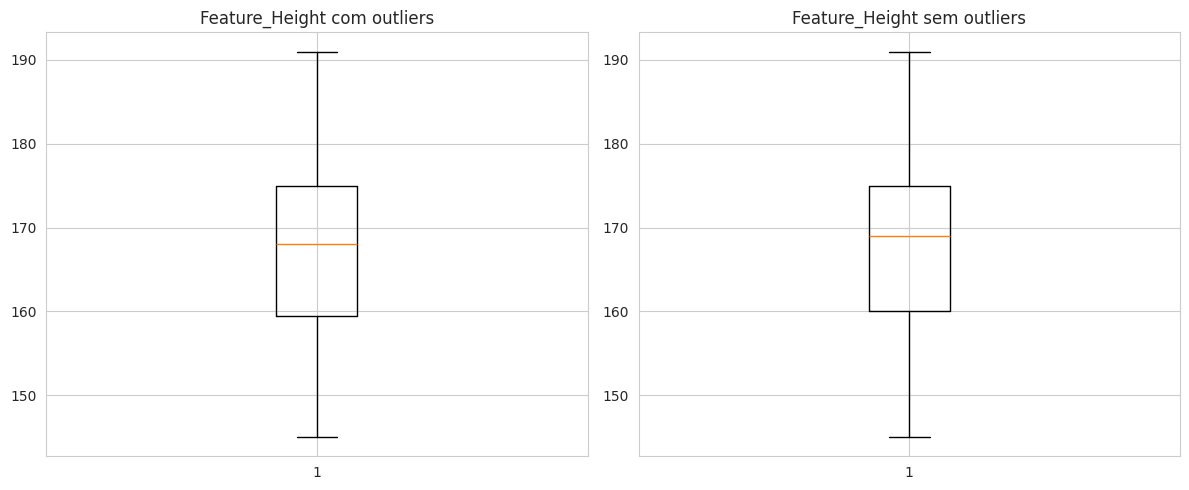

count    319.00000
mean     167.15674
std       10.05303
min      145.00000
25%      159.50000
50%      168.00000
75%      175.00000
max      191.00000
Name: Height, dtype: float64

count    250.000000
mean     167.852000
std       10.084686
min      145.000000
25%      160.000000
50%      169.000000
75%      175.000000
max      191.000000
Name: Height, dtype: float64

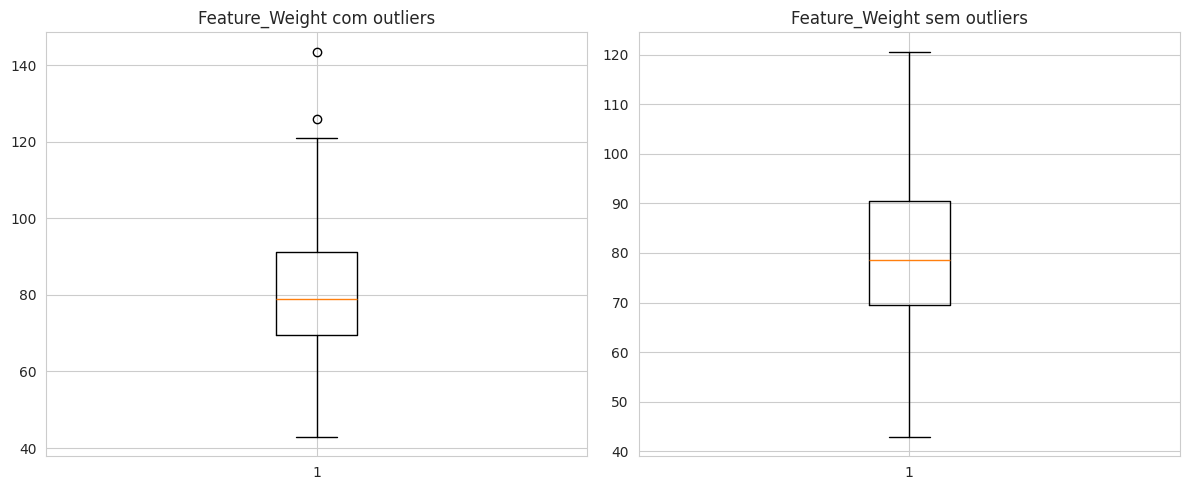

count    319.000000
mean      80.564890
std       15.709069
min       42.900000
25%       69.600000
50%       78.800000
75%       91.250000
max      143.500000
Name: Weight, dtype: float64

count    248.000000
mean      79.645968
std       14.650519
min       42.900000
25%       69.600000
50%       78.550000
75%       90.500000
max      120.600000
Name: Weight, dtype: float64

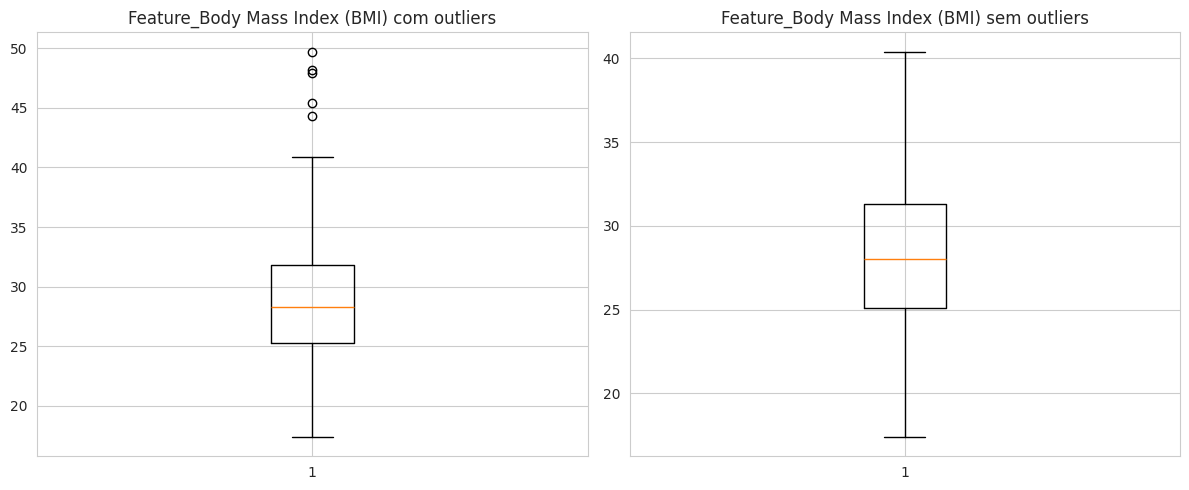

count    319.000000
mean      28.877116
std        5.313707
min       17.400000
25%       25.250000
50%       28.300000
75%       31.850000
max       49.700000
Name: Body Mass Index (BMI), dtype: float64

count    246.000000
mean      28.180488
std        4.702047
min       17.400000
25%       25.125000
50%       28.050000
75%       31.300000
max       40.400000
Name: Body Mass Index (BMI), dtype: float64

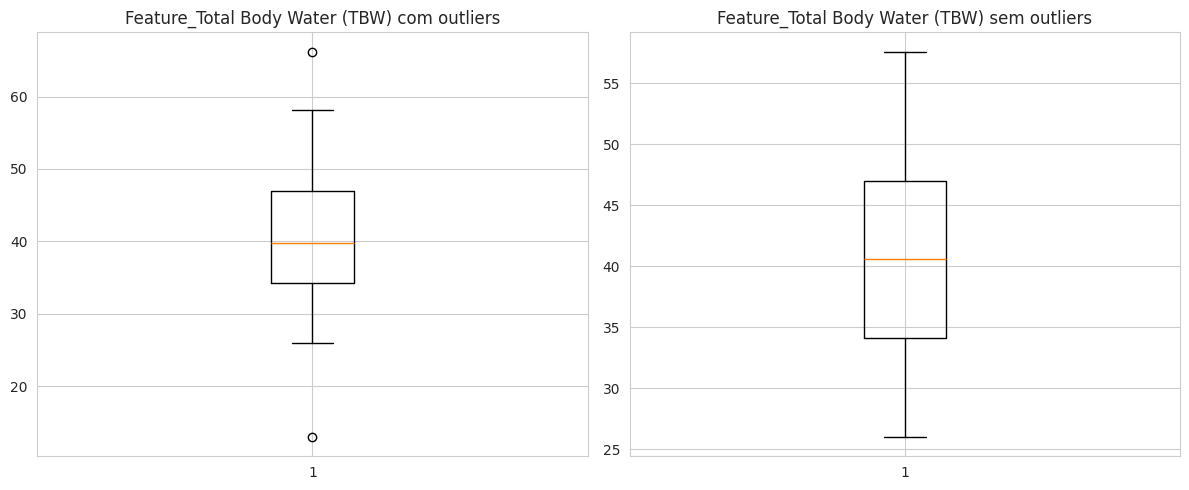

count    319.000000
mean      40.587774
std        7.930235
min       13.000000
25%       34.200000
50%       39.800000
75%       47.000000
max       66.200000
Name: Total Body Water (TBW), dtype: float64

count    245.000000
mean      40.560408
std        7.683697
min       26.000000
25%       34.100000
50%       40.600000
75%       47.000000
max       57.600000
Name: Total Body Water (TBW), dtype: float64

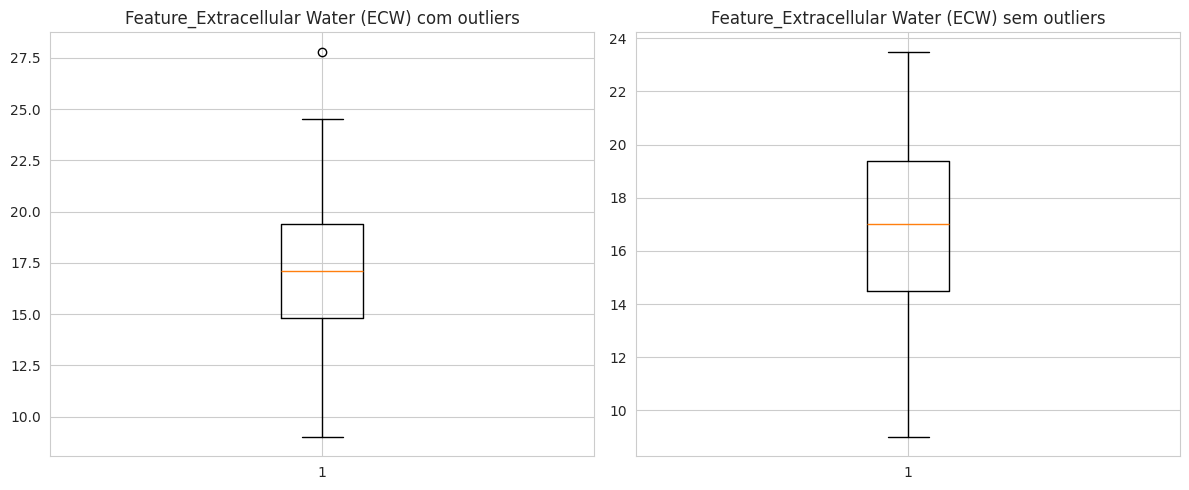

count    319.000000
mean      17.071160
std        3.161857
min        9.000000
25%       14.800000
50%       17.100000
75%       19.400000
max       27.800000
Name: Extracellular Water (ECW), dtype: float64

count    245.000000
mean      16.891429
std        3.109169
min        9.000000
25%       14.500000
50%       17.000000
75%       19.400000
max       23.500000
Name: Extracellular Water (ECW), dtype: float64

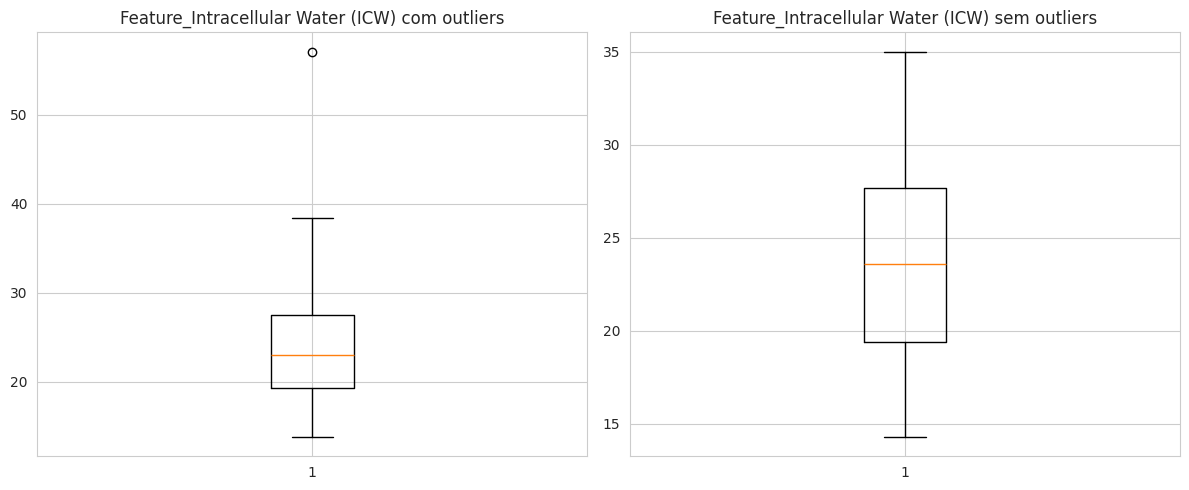

count    319.000000
mean      23.634483
std        5.349332
min       13.800000
25%       19.300000
50%       23.000000
75%       27.550000
max       57.100000
Name: Intracellular Water (ICW), dtype: float64

count    245.000000
mean      23.611020
std        4.907012
min       14.300000
25%       19.400000
50%       23.600000
75%       27.700000
max       35.000000
Name: Intracellular Water (ICW), dtype: float64

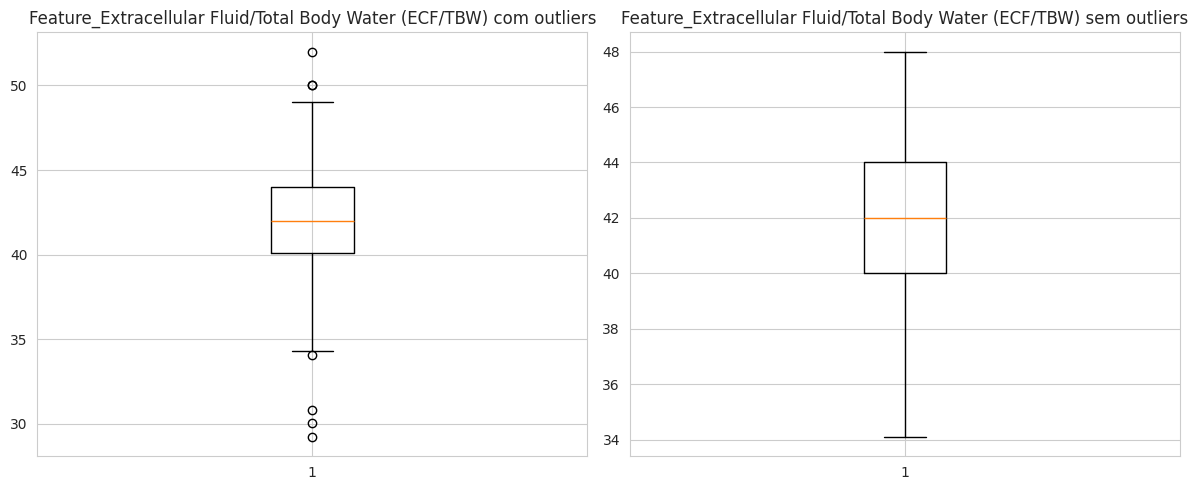

count    319.000000
mean      42.212038
std        3.244470
min       29.230000
25%       40.075000
50%       42.000000
75%       44.000000
max       52.000000
Name: Extracellular Fluid/Total Body Water (ECF/TBW), dtype: float64

count    242.000000
mean      41.903802
std        2.846888
min       34.090000
25%       40.000000
50%       42.000000
75%       44.000000
max       48.000000
Name: Extracellular Fluid/Total Body Water (ECF/TBW), dtype: float64

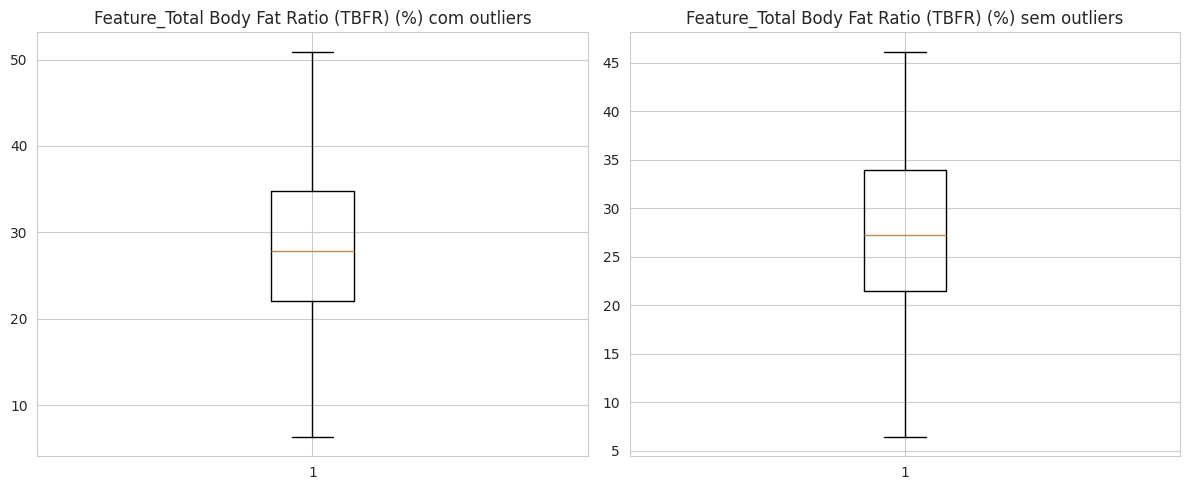

count    319.000000
mean      28.274984
std        8.444417
min        6.300000
25%       22.025000
50%       27.820000
75%       34.810000
max       50.920000
Name: Total Body Fat Ratio (TBFR) (%), dtype: float64

count    242.000000
mean      27.464876
std        8.022992
min        6.400000
25%       21.500000
50%       27.200000
75%       33.930000
max       46.130000
Name: Total Body Fat Ratio (TBFR) (%), dtype: float64

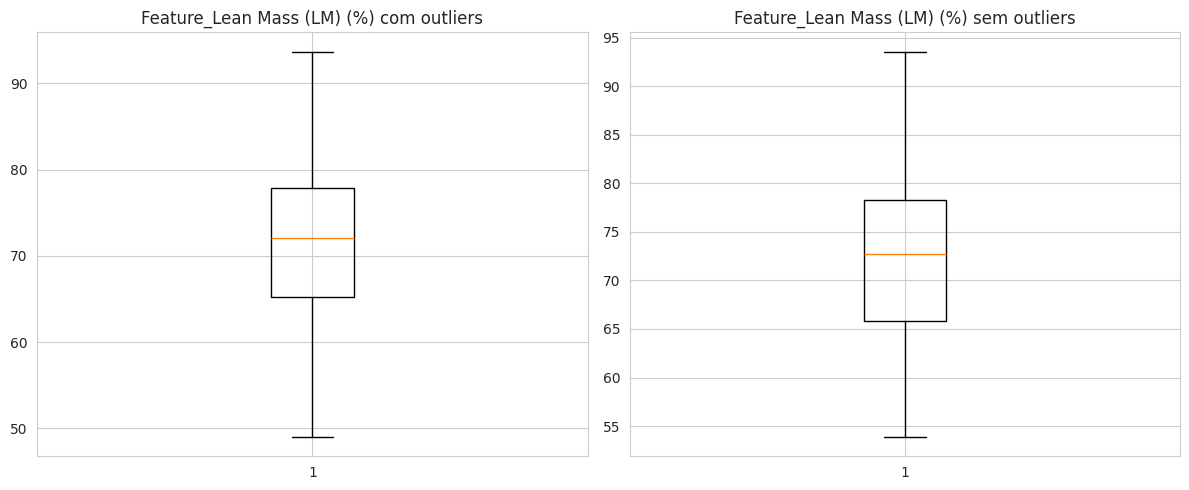

count    319.000000
mean      71.638245
std        8.437598
min       48.990000
25%       65.165000
50%       72.110000
75%       77.850000
max       93.670000
Name: Lean Mass (LM) (%), dtype: float64

count    242.000000
mean      72.407025
std        8.011802
min       53.870000
25%       65.840000
50%       72.685000
75%       78.297500
max       93.580000
Name: Lean Mass (LM) (%), dtype: float64

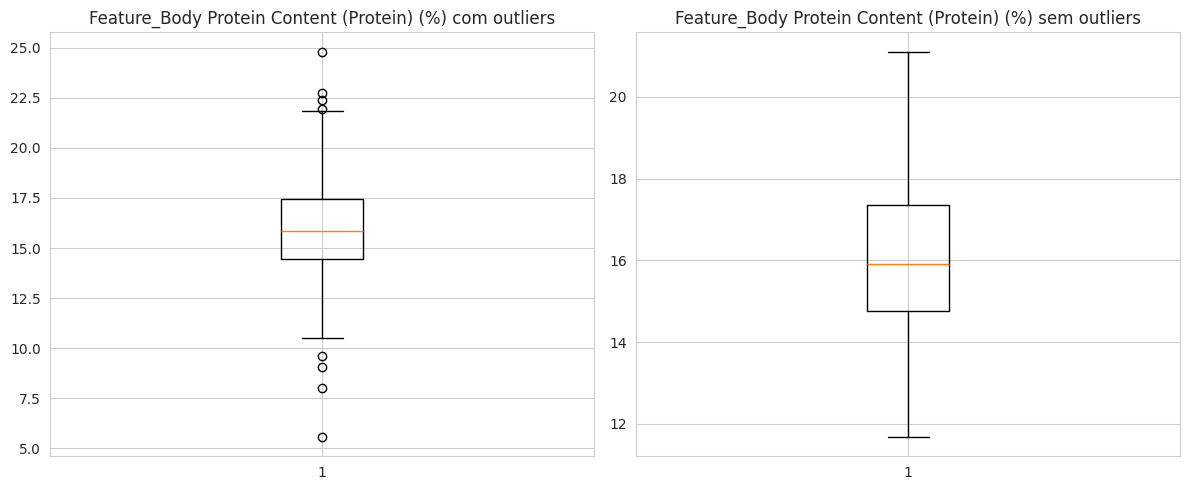

count    319.000000
mean      15.938809
std        2.334744
min        5.560000
25%       14.465000
50%       15.870000
75%       17.430000
max       24.810000
Name: Body Protein Content (Protein) (%), dtype: float64

count    235.000000
mean      16.086085
std        1.859528
min       11.680000
25%       14.755000
50%       15.920000
75%       17.365000
max       21.110000
Name: Body Protein Content (Protein) (%), dtype: float64

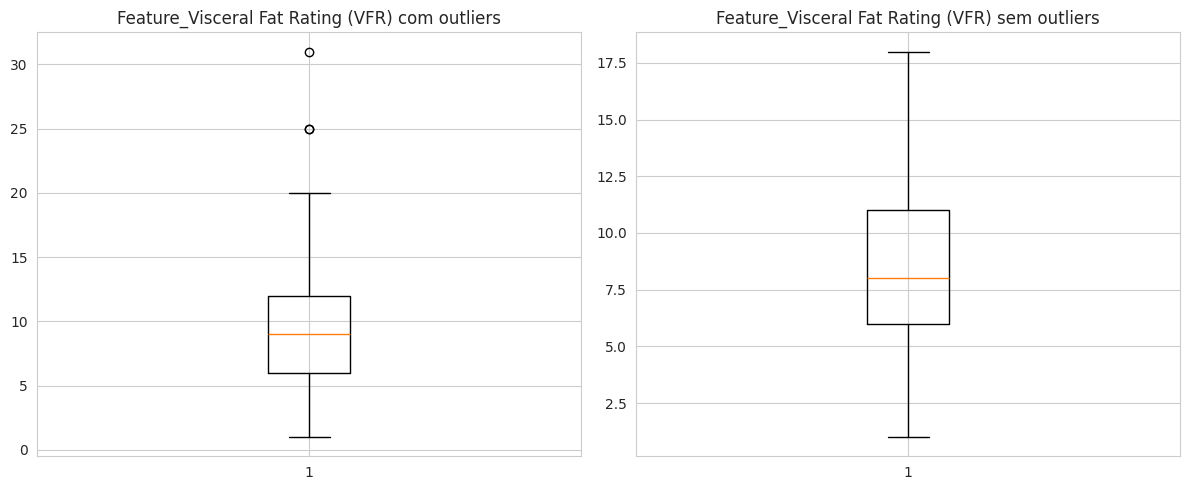

count    319.000000
mean       9.078370
std        4.332501
min        1.000000
25%        6.000000
50%        9.000000
75%       12.000000
max       31.000000
Name: Visceral Fat Rating (VFR), dtype: float64

count    235.000000
mean       8.425532
std        3.687265
min        1.000000
25%        6.000000
50%        8.000000
75%       11.000000
max       18.000000
Name: Visceral Fat Rating (VFR), dtype: float64

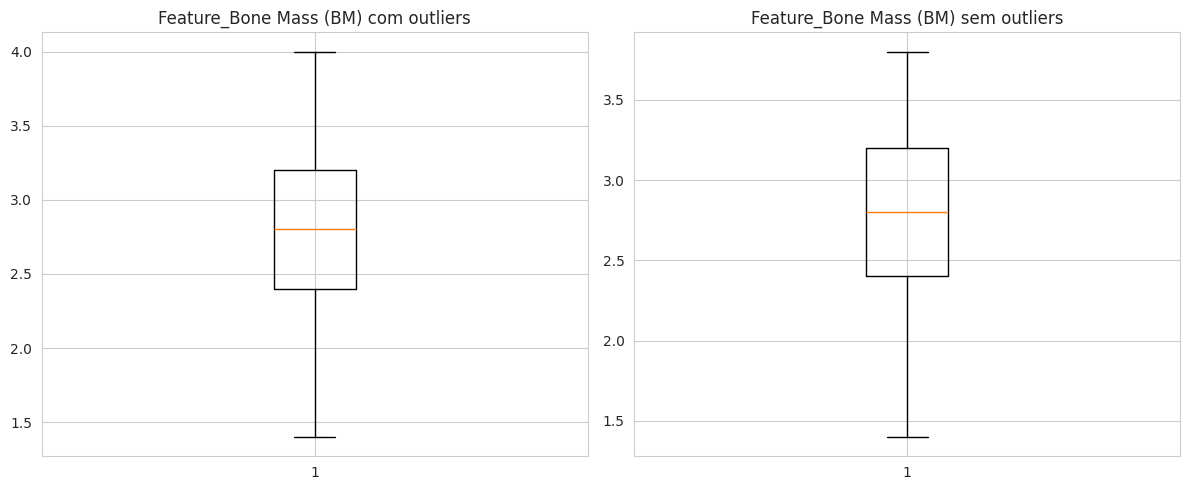

count    319.000000
mean       2.803292
std        0.509467
min        1.400000
25%        2.400000
50%        2.800000
75%        3.200000
max        4.000000
Name: Bone Mass (BM), dtype: float64

count    235.000000
mean       2.805319
std        0.508206
min        1.400000
25%        2.400000
50%        2.800000
75%        3.200000
max        3.800000
Name: Bone Mass (BM), dtype: float64

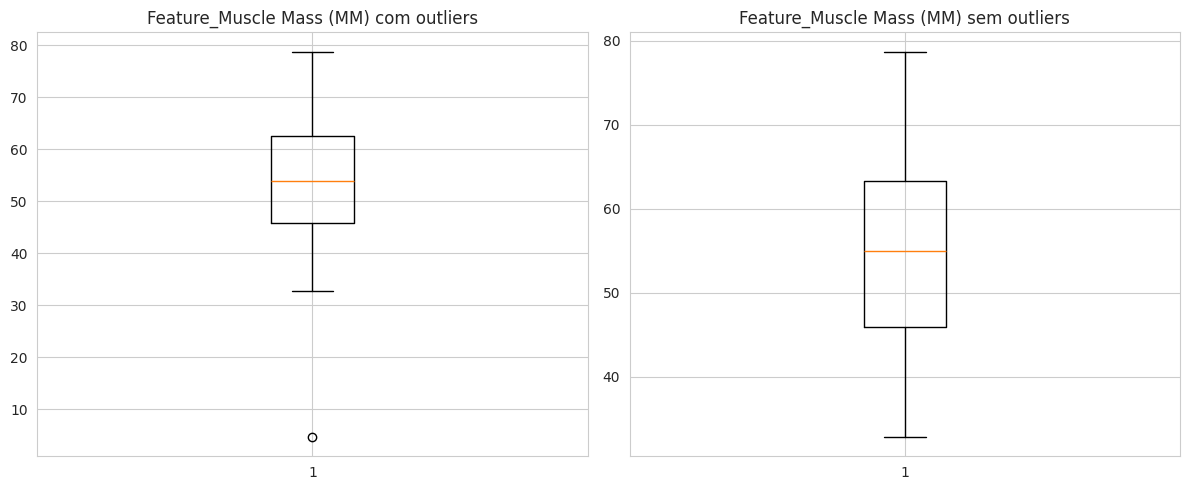

count    319.000000
mean      54.273041
std       10.603833
min        4.700000
25%       45.800000
50%       53.900000
75%       62.600000
max       78.800000
Name: Muscle Mass (MM), dtype: float64

count    234.000000
mean      54.637179
std       10.183751
min       32.800000
25%       45.950000
50%       54.900000
75%       63.275000
max       78.700000
Name: Muscle Mass (MM), dtype: float64

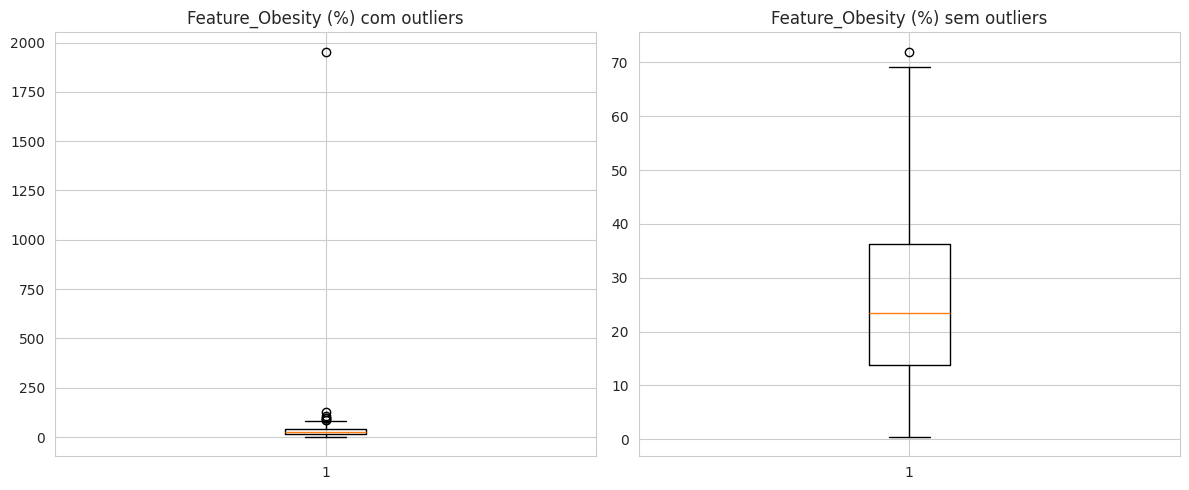

count     319.000000
mean       35.850125
std       109.799718
min         0.400000
25%        13.900000
50%        25.600000
75%        41.750000
max      1954.000000
Name: Obesity (%), dtype: float64

count    229.000000
mean      26.134672
std       16.217566
min        0.400000
25%       13.700000
50%       23.500000
75%       36.300000
max       72.000000
Name: Obesity (%), dtype: float64

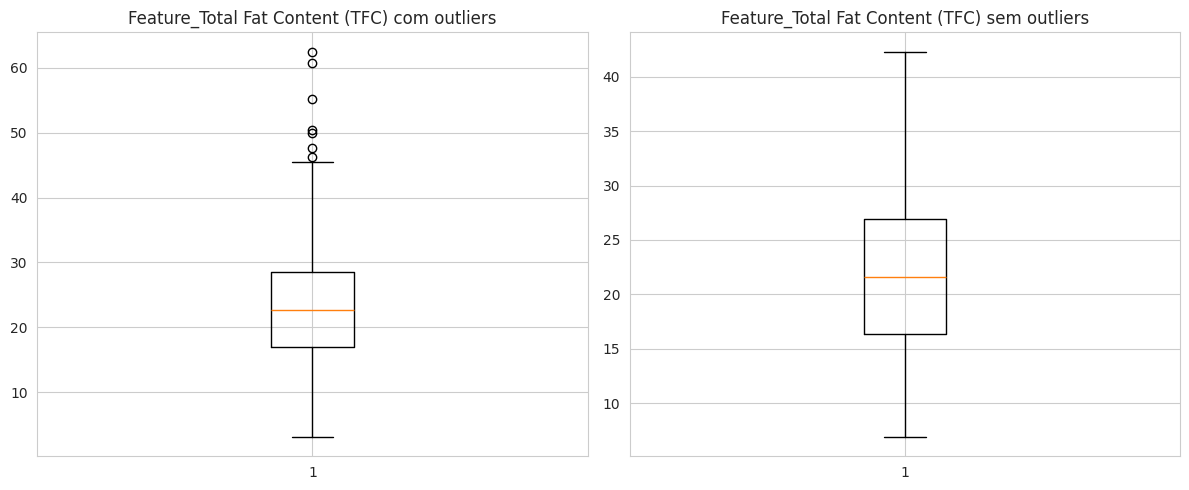

count    319.000000
mean      23.487774
std        9.607607
min        3.100000
25%       17.000000
50%       22.600000
75%       28.550000
max       62.500000
Name: Total Fat Content (TFC), dtype: float64

count    228.000000
mean      21.896053
std        7.664607
min        6.900000
25%       16.400000
50%       21.600000
75%       26.900000
max       42.300000
Name: Total Fat Content (TFC), dtype: float64

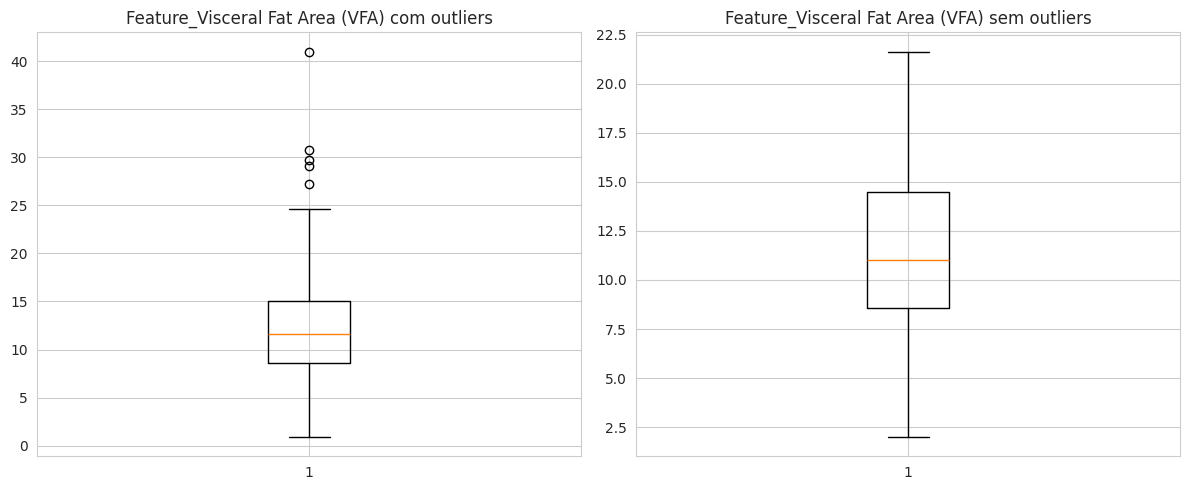

count    319.000000
mean      12.171599
std        5.262178
min        0.900000
25%        8.570000
50%       11.590000
75%       15.100000
max       41.000000
Name: Visceral Fat Area (VFA), dtype: float64

count    225.000000
mean      11.375778
std        4.080793
min        2.000000
25%        8.560000
50%       11.000000
75%       14.500000
max       21.630000
Name: Visceral Fat Area (VFA), dtype: float64

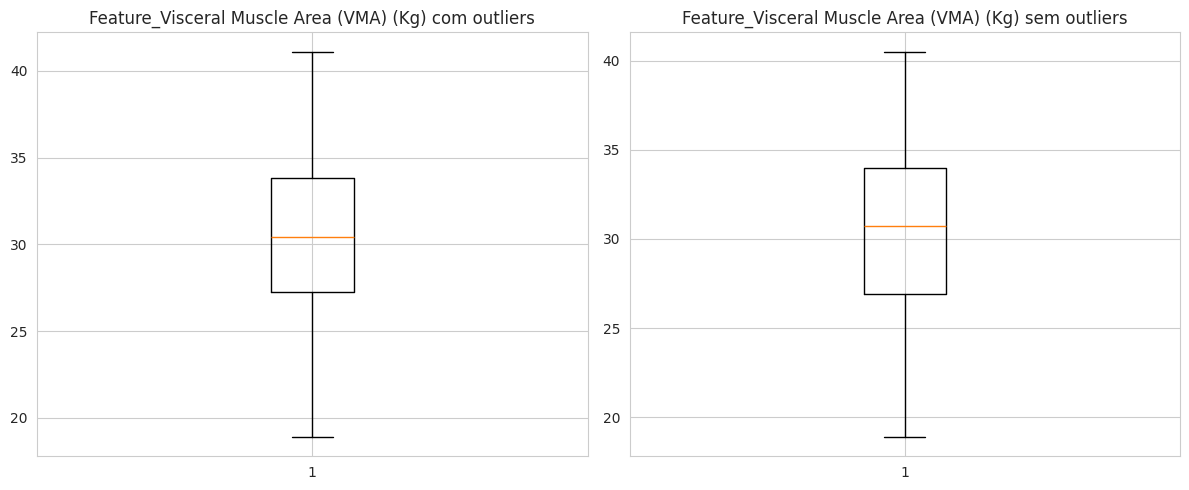

count    319.000000
mean      30.403448
std        4.460530
min       18.900000
25%       27.250000
50%       30.408108
75%       33.800000
max       41.100000
Name: Visceral Muscle Area (VMA) (Kg), dtype: float64

count    225.000000
mean      30.442739
std        4.587663
min       18.900000
25%       26.900000
50%       30.700000
75%       34.000000
max       40.500000
Name: Visceral Muscle Area (VMA) (Kg), dtype: float64

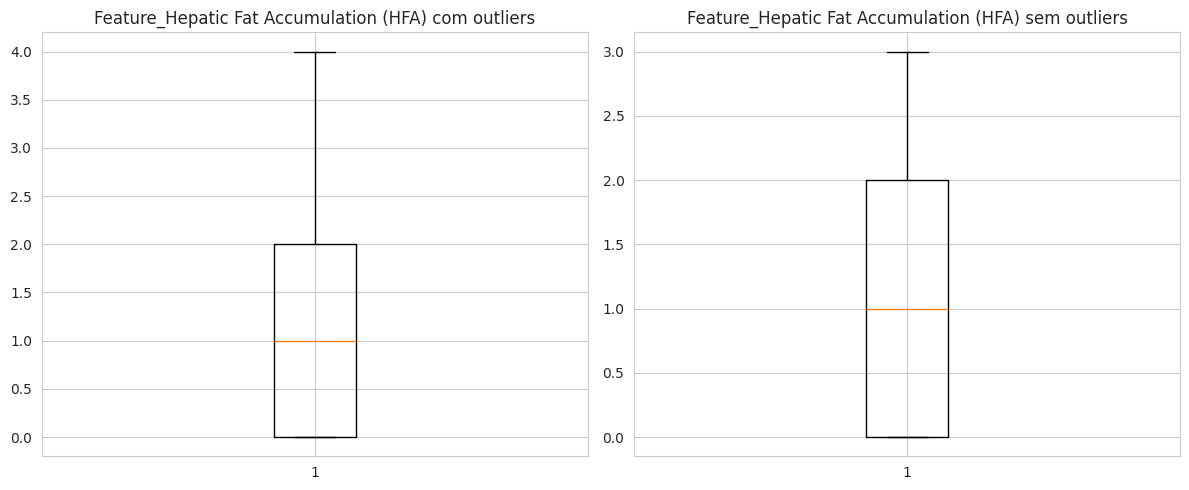

count    319.000000
mean       1.150470
std        1.059217
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Hepatic Fat Accumulation (HFA), dtype: float64

count    225.000000
mean       0.973333
std        1.012952
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Hepatic Fat Accumulation (HFA), dtype: float64

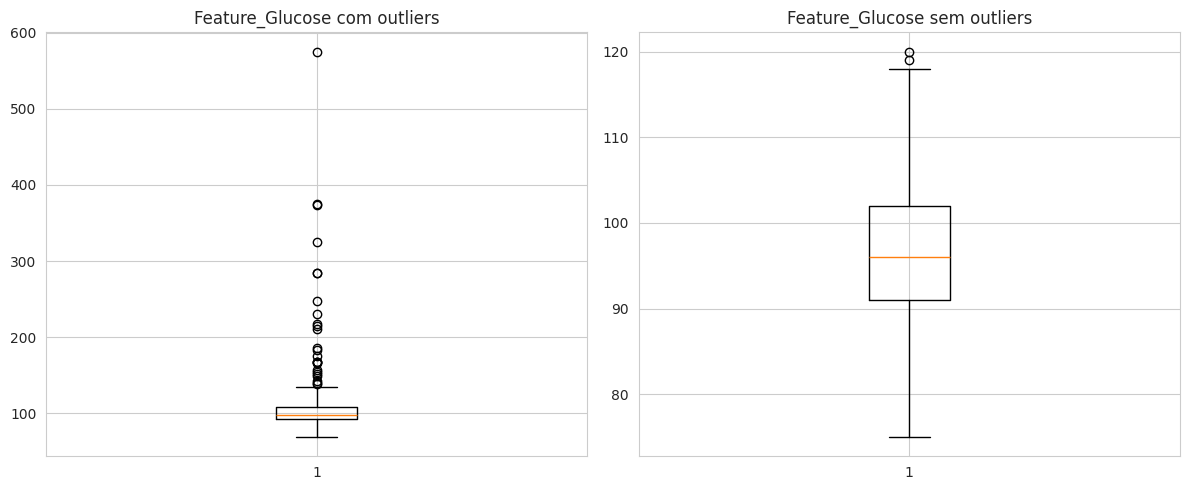

count    319.000000
mean     108.688715
std       44.848714
min       69.000000
25%       92.000000
50%       98.000000
75%      109.000000
max      575.000000
Name: Glucose, dtype: float64

count    216.000000
mean      96.838889
std        8.734144
min       75.000000
25%       91.000000
50%       96.000000
75%      102.000000
max      120.000000
Name: Glucose, dtype: float64

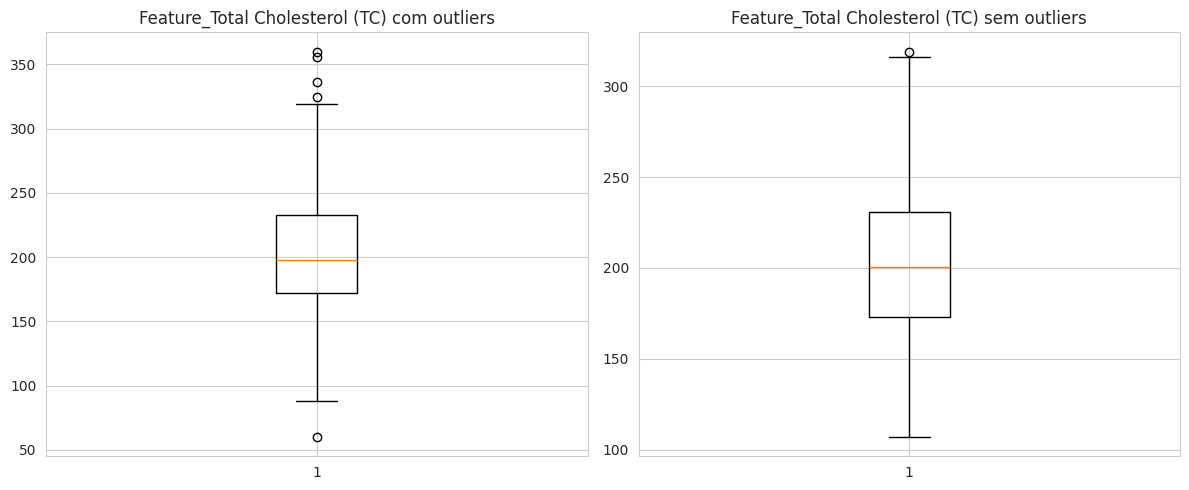

count    319.000000
mean     203.495298
std       45.758501
min       60.000000
25%      172.000000
50%      198.000000
75%      233.000000
max      360.000000
Name: Total Cholesterol (TC), dtype: float64

count    212.000000
mean     203.429245
std       40.930495
min      107.000000
25%      172.750000
50%      200.500000
75%      231.000000
max      319.000000
Name: Total Cholesterol (TC), dtype: float64

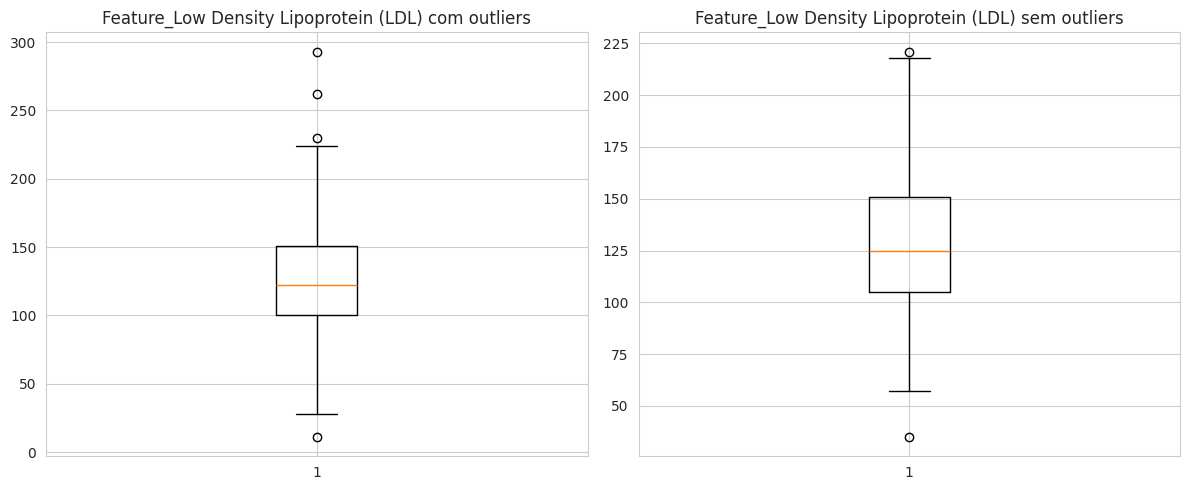

count    319.000000
mean     126.652351
std       38.541175
min       11.000000
25%      100.500000
50%      122.000000
75%      151.000000
max      293.000000
Name: Low Density Lipoprotein (LDL), dtype: float64

count    210.000000
mean     127.897619
std       33.886953
min       35.000000
25%      105.000000
50%      125.000000
75%      151.000000
max      221.000000
Name: Low Density Lipoprotein (LDL), dtype: float64

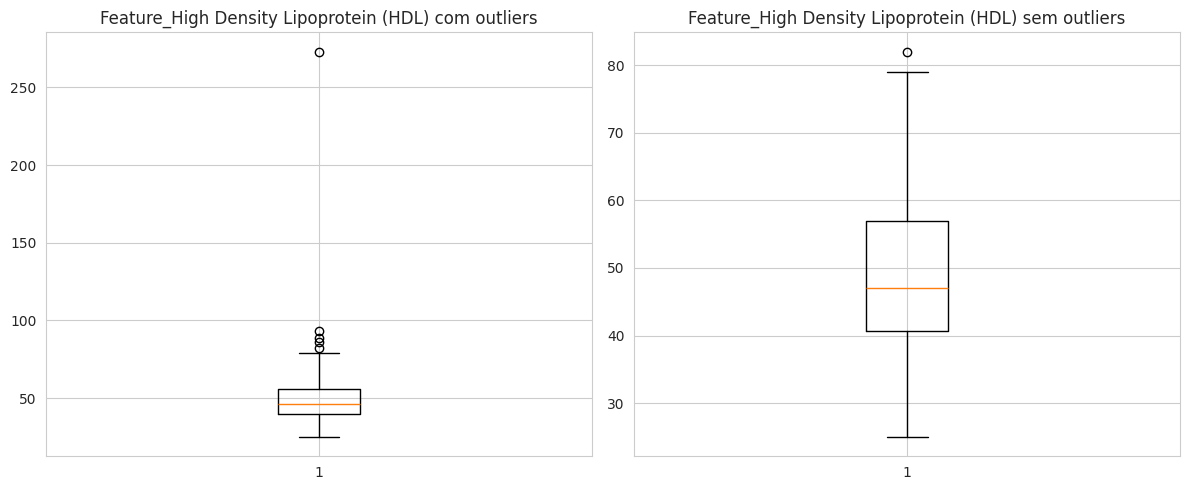

count    319.000000
mean      49.475549
std       17.718701
min       25.000000
25%       40.000000
50%       46.500000
75%       56.000000
max      273.000000
Name: High Density Lipoprotein (HDL), dtype: float64

count    208.000000
mean      49.327885
std       12.158252
min       25.000000
25%       40.750000
50%       47.000000
75%       57.000000
max       82.000000
Name: High Density Lipoprotein (HDL), dtype: float64

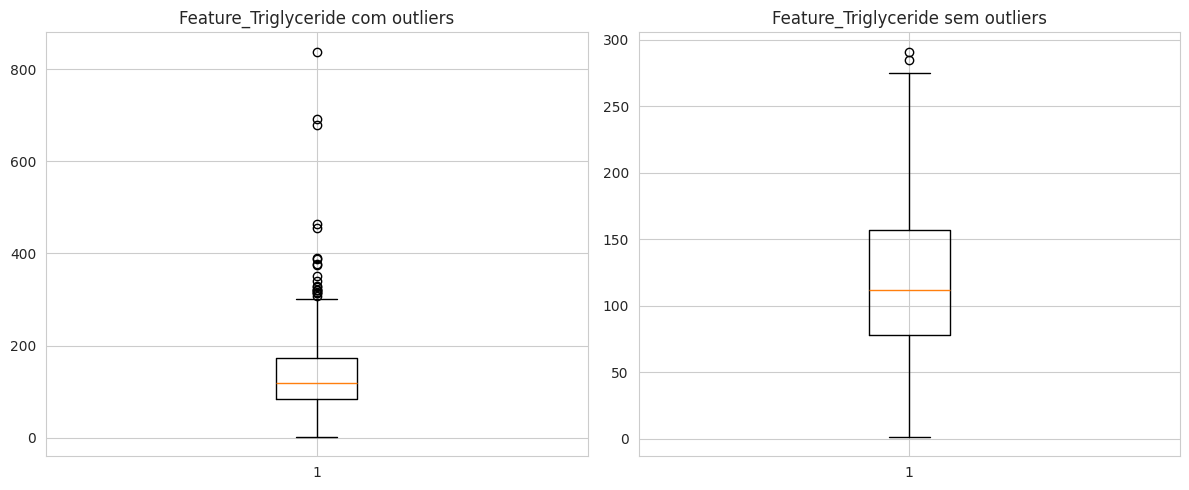

count    319.000000
mean     144.502163
std       97.904493
min        1.390000
25%       83.000000
50%      119.000000
75%      172.000000
max      838.000000
Name: Triglyceride, dtype: float64

count    199.000000
mean     121.988392
std       58.073257
min        1.390000
25%       78.000000
50%      112.000000
75%      157.000000
max      291.000000
Name: Triglyceride, dtype: float64

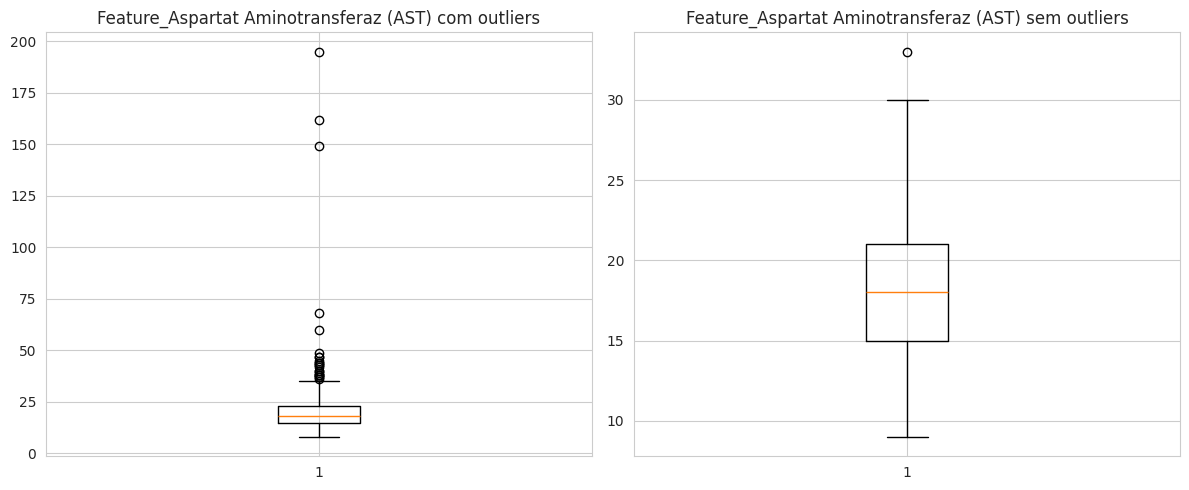

count    319.000000
mean      21.684953
std       16.697605
min        8.000000
25%       15.000000
50%       18.000000
75%       23.000000
max      195.000000
Name: Aspartat Aminotransferaz (AST), dtype: float64

count    178.000000
mean      18.497191
std        4.790674
min        9.000000
25%       15.000000
50%       18.000000
75%       21.000000
max       33.000000
Name: Aspartat Aminotransferaz (AST), dtype: float64

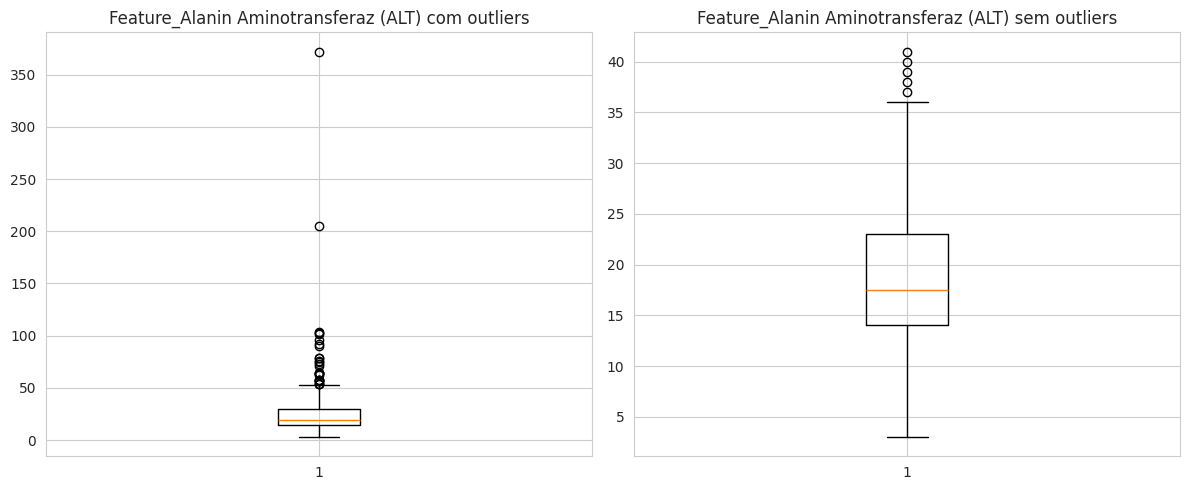

count    319.000000
mean      26.855799
std       27.884413
min        3.000000
25%       14.250000
50%       19.000000
75%       30.000000
max      372.000000
Name: Alanin Aminotransferaz (ALT), dtype: float64

count    166.000000
mean      19.108434
std        7.605639
min        3.000000
25%       14.000000
50%       17.500000
75%       23.000000
max       41.000000
Name: Alanin Aminotransferaz (ALT), dtype: float64

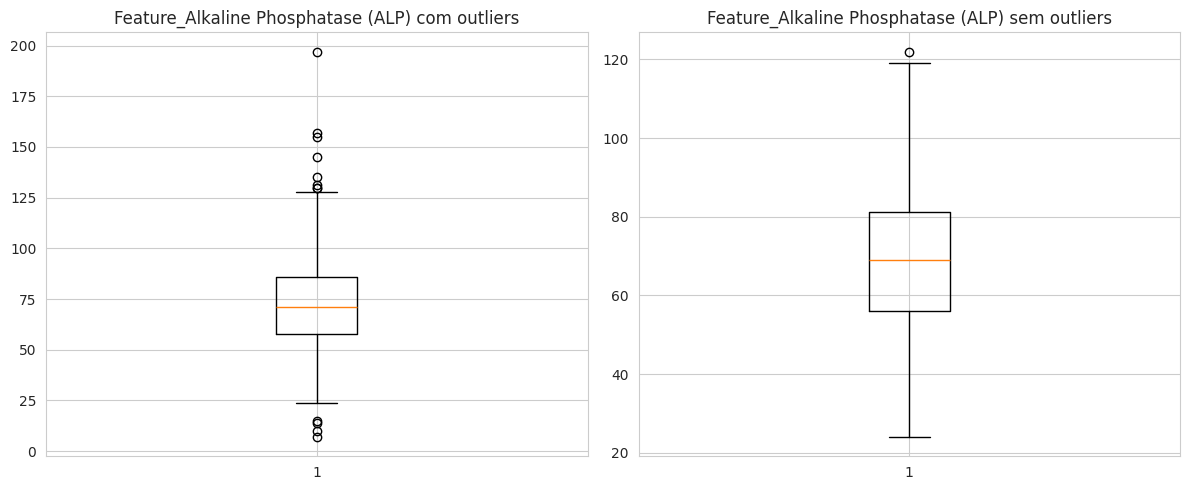

count    319.000000
mean      73.112539
std       24.181069
min        7.000000
25%       58.000000
50%       71.000000
75%       86.000000
max      197.000000
Name: Alkaline Phosphatase (ALP), dtype: float64

count    158.000000
mean      70.546835
std       19.923934
min       24.000000
25%       56.000000
50%       69.000000
75%       81.300000
max      122.000000
Name: Alkaline Phosphatase (ALP), dtype: float64

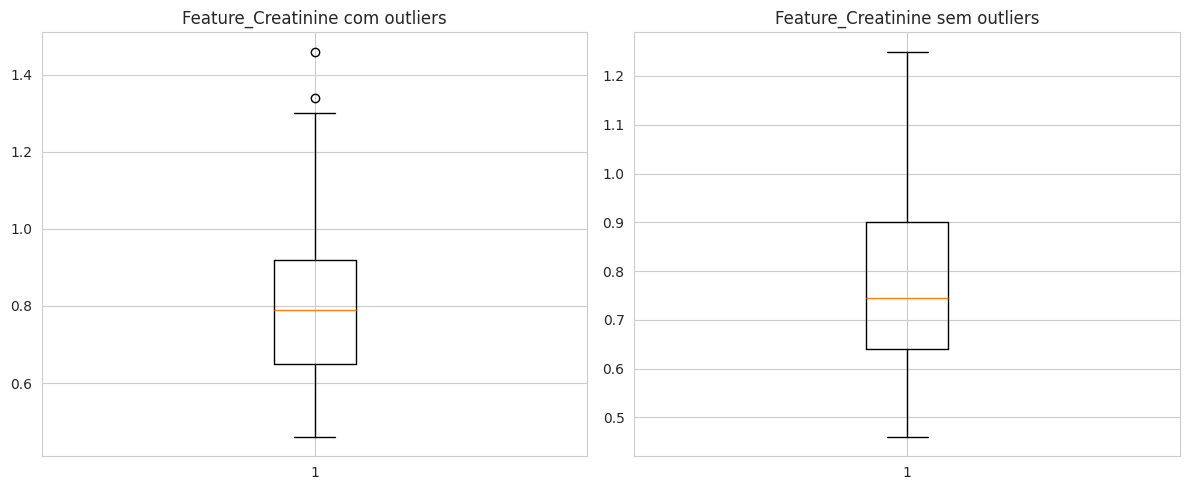

count    319.000000
mean       0.800611
std        0.176433
min        0.460000
25%        0.650000
50%        0.790000
75%        0.920000
max        1.460000
Name: Creatinine, dtype: float64

count    158.000000
mean       0.781108
std        0.177300
min        0.460000
25%        0.640000
50%        0.745000
75%        0.900000
max        1.250000
Name: Creatinine, dtype: float64

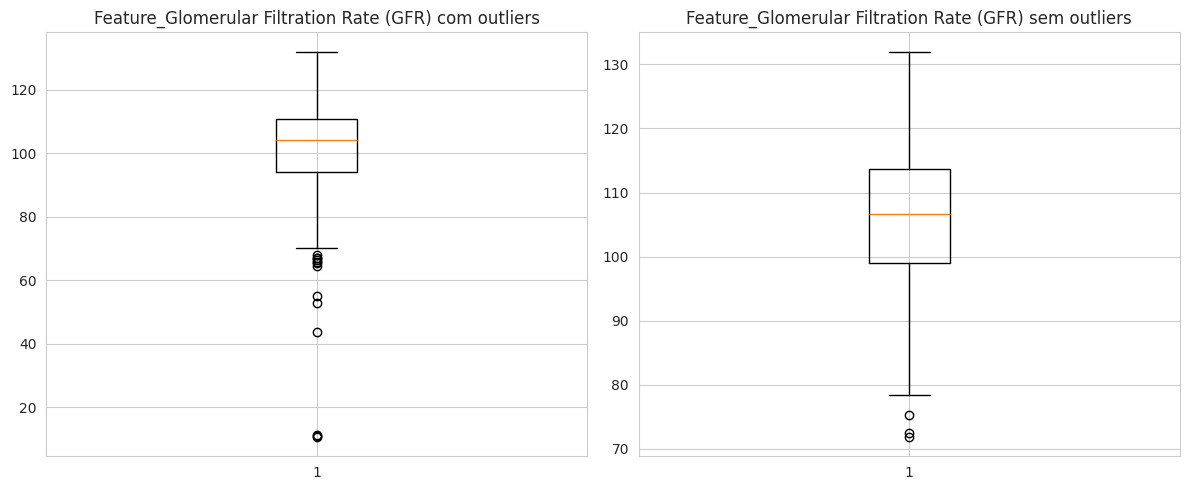

count    319.000000
mean     100.818903
std       16.971396
min       10.600000
25%       94.170000
50%      104.000000
75%      110.745000
max      132.000000
Name: Glomerular Filtration Rate (GFR), dtype: float64

count    150.000000
mean     105.191418
std       12.341327
min       71.830000
25%       98.925000
50%      106.600000
75%      113.652167
max      132.000000
Name: Glomerular Filtration Rate (GFR), dtype: float64

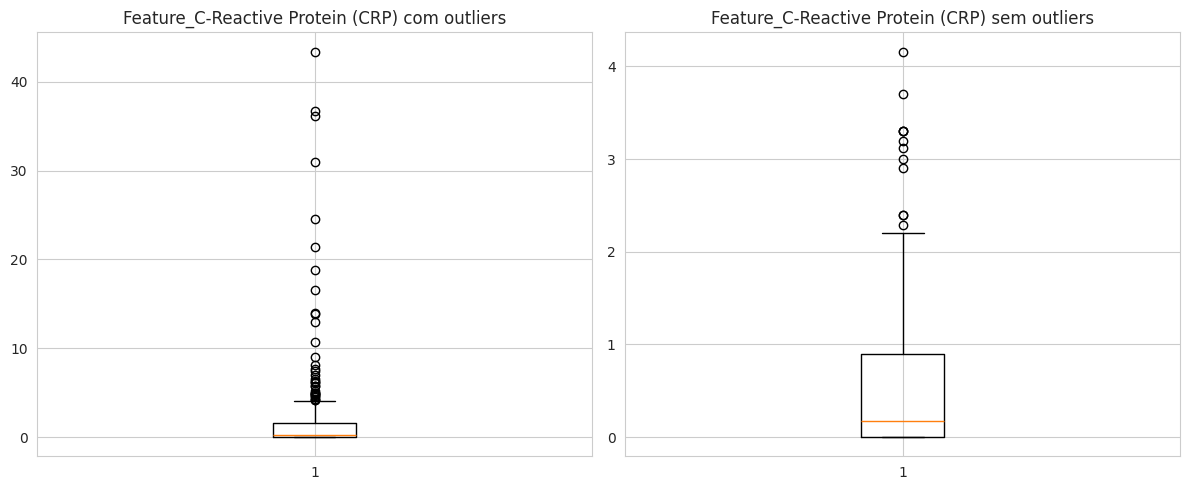

count    319.000000
mean       1.853856
std        4.989591
min        0.000000
25%        0.000000
50%        0.215000
75%        1.615000
max       43.400000
Name: C-Reactive Protein (CRP), dtype: float64

count    137.000000
mean       0.673832
std        0.980847
min        0.000000
25%        0.000000
50%        0.170000
75%        0.900000
max        4.160000
Name: C-Reactive Protein (CRP), dtype: float64

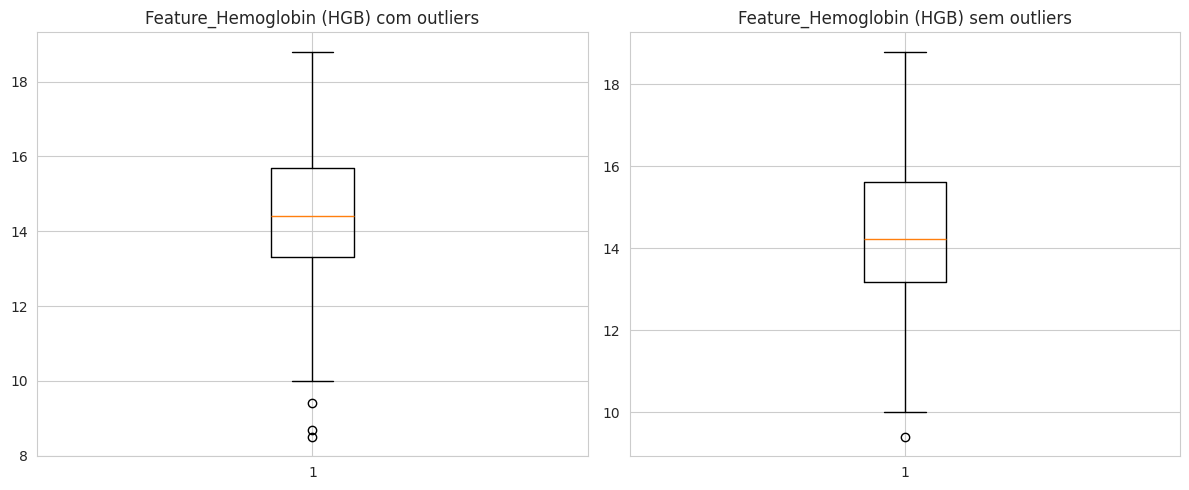

count    319.000000
mean      14.418182
std        1.775815
min        8.500000
25%       13.300000
50%       14.400000
75%       15.700000
max       18.800000
Name: Hemoglobin (HGB), dtype: float64

count    136.000000
mean      14.299632
std        1.718403
min        9.400000
25%       13.175000
50%       14.225000
75%       15.625000
max       18.800000
Name: Hemoglobin (HGB), dtype: float64

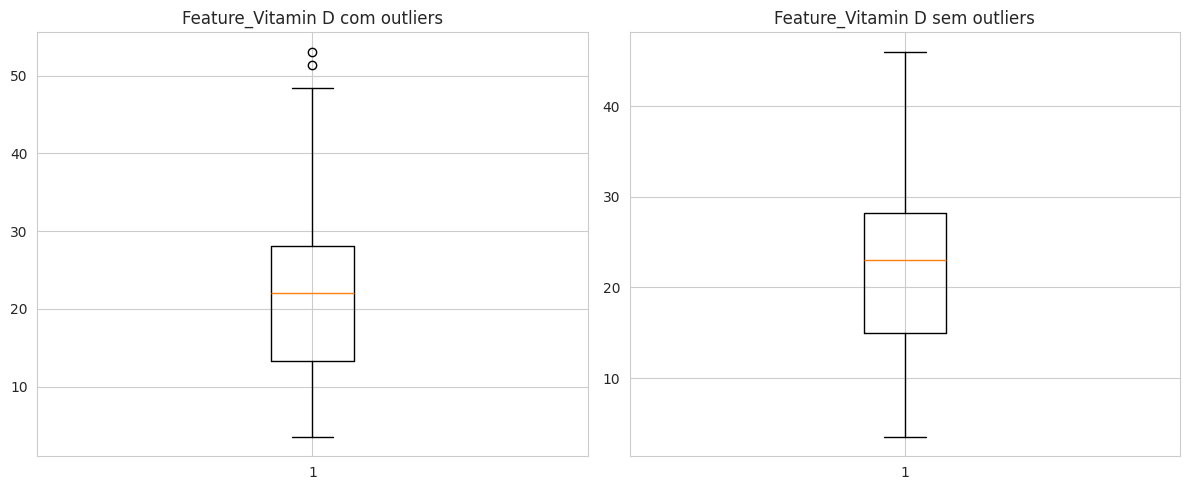

count    319.000000
mean      21.401411
std        9.981659
min        3.500000
25%       13.250000
50%       22.000000
75%       28.060000
max       53.100000
Name: Vitamin D, dtype: float64

count    136.000000
mean      21.357812
std        9.343601
min        3.500000
25%       15.000000
50%       23.062500
75%       28.173333
max       46.000000
Name: Vitamin D, dtype: float64

In [14]:
# Process and plot for one feature
# features_to_process = [
#     'C-Reactive Protein (CRP)',
#     'Glomerular Filtration Rate (GFR)',
#     'Alkaline Phosphatase (ALP)',
#     'Alanin Aminotransferaz (ALT)',
#     'Aspartat Aminotransferaz (AST)',
#     'Triglyceride',
#     'High Density Lipoprotein (HDL)',
#     'Glucose'
# ]

features_to_process = df.columns

df_exclude_columns = df.copy()

for feature_name in features_to_process:
    df_exclude_columns = remove_outliers(df_exclude_columns, [feature_name])

    # Get data before and after outlier removal
    feature_with_outliers = df[feature_name].dropna()
    feature_without_outliers = df_exclude_columns[feature_name].dropna()

    # Run the boxplot function
    plot_feature_boxplots(feature_with_outliers, feature_without_outliers, feature_name)

    # Describe the dataframe after removing outliers for the current feature
    display(feature_with_outliers.describe())
    display(feature_without_outliers.describe())

In [15]:
df_exclude_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 315
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                136 non-null    int64  
 1   Age                                             136 non-null    int64  
 2   Gender                                          136 non-null    int64  
 3   Comorbidity                                     136 non-null    int64  
 4   Coronary Artery Disease (CAD)                   136 non-null    int64  
 5   Hypothyroidism                                  136 non-null    int64  
 6   Hyperlipidemia                                  136 non-null    int64  
 7   Diabetes Mellitus (DM)                          136 non-null    int64  
 8   Height                                          136 non-null    int64  
 9   Weight                                          

<Axes: >

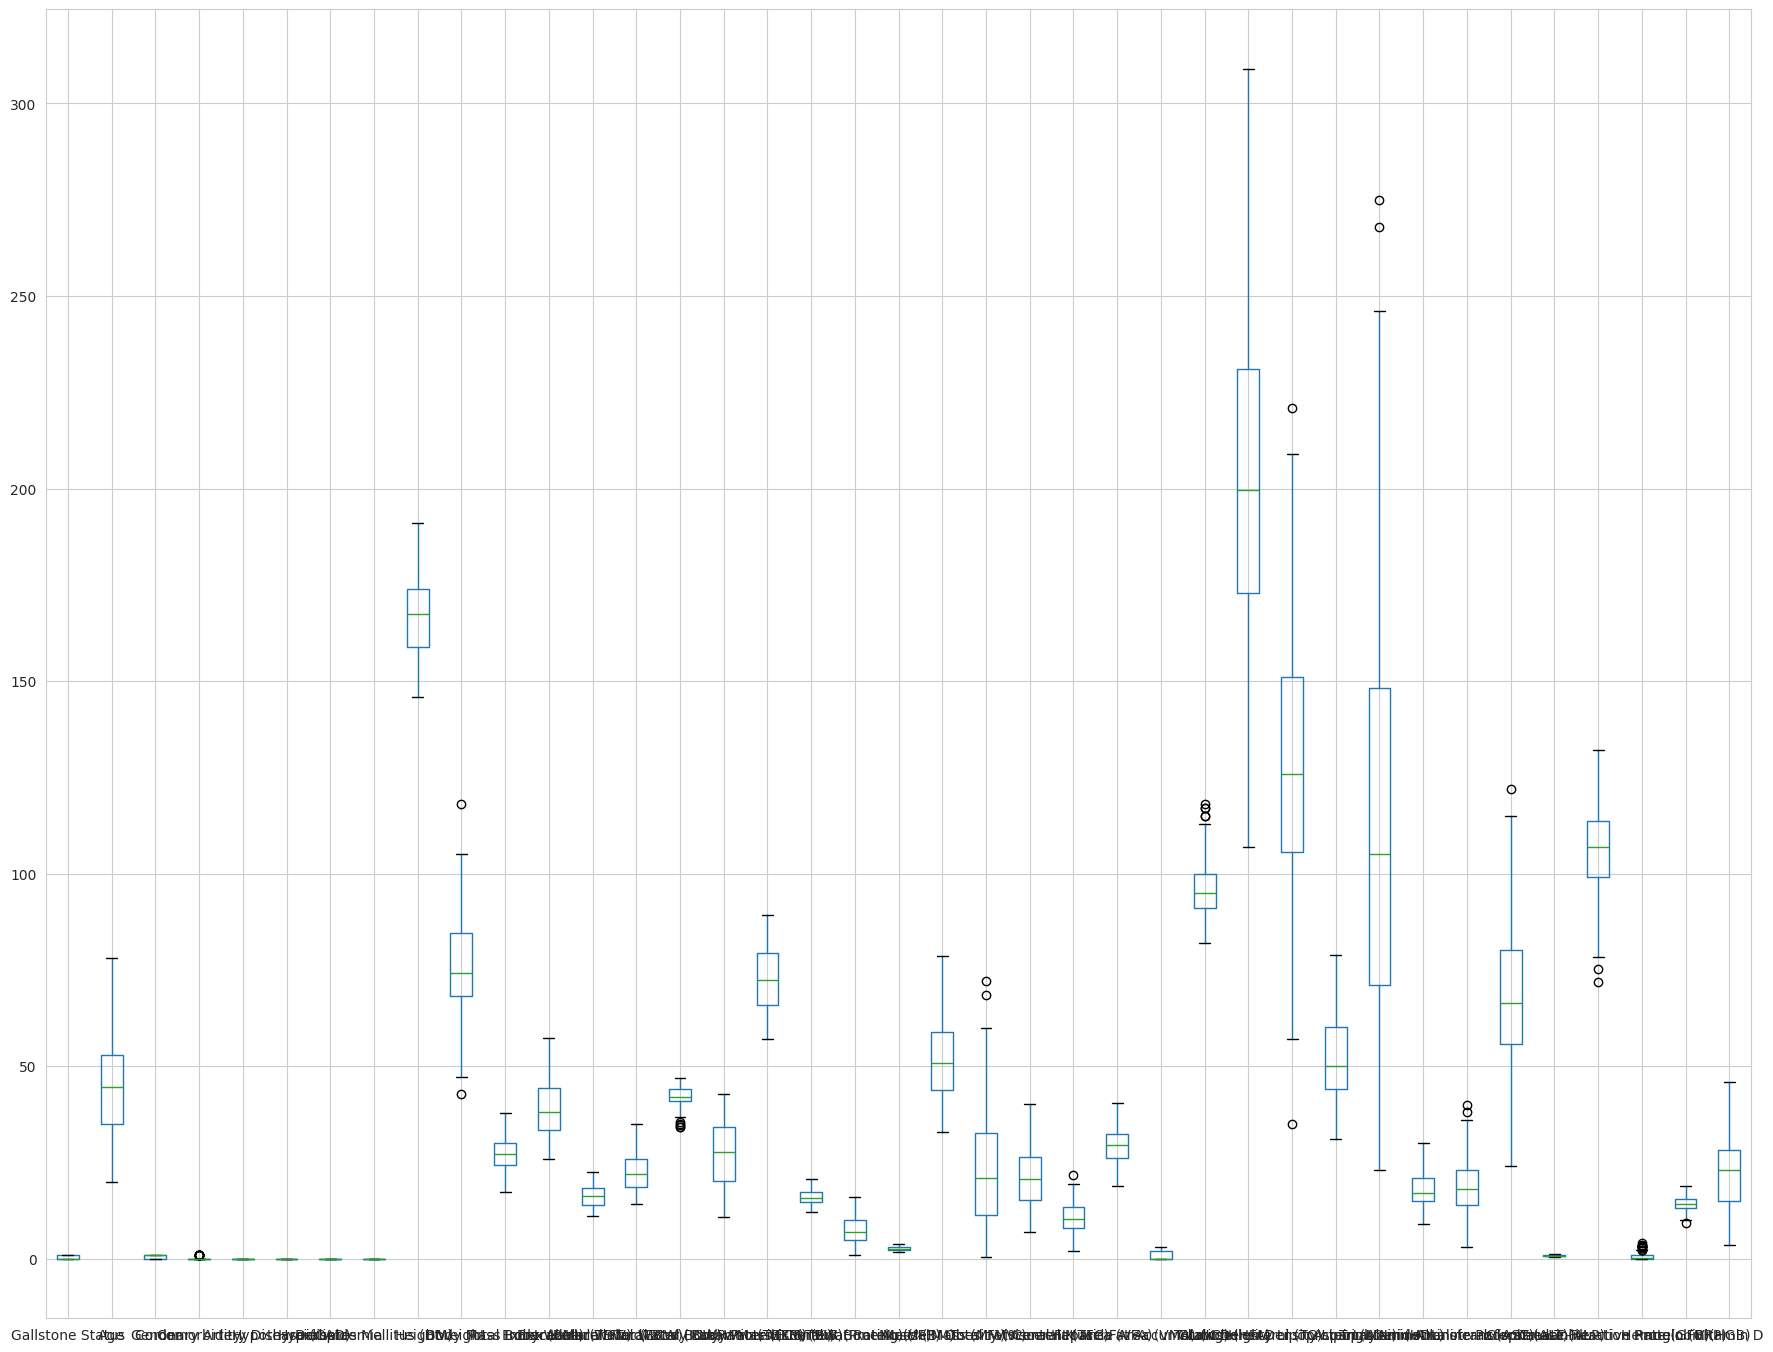

In [16]:
df_exclude_columns.boxplot(figsize=(22, 17))

In [17]:
# @title Separação das variáveis

if 'df' in locals():
    # A variável alvo é 'Gallstone Status'
    X = df_exclude_columns.drop('Gallstone Status', axis=1)
    y = df_exclude_columns['Gallstone Status']

    print("Variáveis de entrada (X) shape:", X.shape)
    print("Variável alvo (y) shape:", y.shape)

Variáveis de entrada (X) shape: (136, 38)
Variável alvo (y) shape: (136,)


In [18]:
# @title Divisão Treino e Teste

if 'df' in locals():
    # 80%/20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

    print("Tamanho do conjunto de treino:", X_train.shape)
    print("Tamanho do conjunto de teste:", X_test.shape)

'''
X: variáveis de entrada (features).
y: variável alvo (target).
test_size: proporção do conjunto de dados total para teste.
random_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.
shuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.
stratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.
'''

Tamanho do conjunto de treino: (108, 38)
Tamanho do conjunto de teste: (28, 38)


'\nX: variáveis de entrada (features).\ny: variável alvo (target).\ntest_size: proporção do conjunto de dados total para teste.\nrandom_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.\nshuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.\nstratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.\n'

In [19]:
# @title Escalonamento
'''
Justificativa: Algoritmos como a Regressão Logística são sensíveis à escala das variáveis.
StandardScaler transforma os dados para terem média 0 e desvio padrão 1.
'''

scaler = StandardScaler()

# Ajuste do scaler APENAS com os dados de treino para evitar vazamento de dados (data leakage)
X_train_scaled = scaler.fit_transform(X_train)
# Aplicamos a mesma transformação aos dados de teste
X_test_scaled = scaler.transform(X_test)

In [20]:
# @title GridSeachCV

if 'df' in locals():
    #Definir a estratégia de validação cruzada
    kfold = KFold(n_splits=10, shuffle=True, random_state=25)

    #Definir os modelos e seus respectivos grids de hiper-parâmetros
    # Regressão Logística
    log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'], # três parametros em cada
    'solver': ['liblinear'] # Bom para datasets pequenos
    }
    log_reg = LogisticRegression(random_state=25)
    grid_log_reg = GridSearchCV(log_reg, log_reg_params, cv=kfold, scoring='f1', n_jobs=-1)

    # Random Forest
    rf_params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    rf = RandomForestClassifier(random_state=25)
    grid_rf = GridSearchCV(rf, rf_params, cv=kfold, scoring='f1', n_jobs=-1)


In [21]:
# @title Treinamento

if 'df' in locals():
    print("Iniciando o treinamento da Regressão Logística...")
    grid_log_reg.fit(X_train_scaled, y_train)
    print("Treinamento da Regressão Logística concluído.")

    print("\nIniciando o treinamento do Random Forest...")
    grid_rf.fit(X_train_scaled, y_train)
    print("Treinamento do Random Forest concluído.")

Iniciando o treinamento da Regressão Logística...
Treinamento da Regressão Logística concluído.

Iniciando o treinamento do Random Forest...
Treinamento do Random Forest concluído.


In [22]:
# @title Melhores parâmetros e scores
if 'df' in locals():
    print("--- Resultados da Regressão Logística ---")
    print("Melhores Hiper-parâmetros:", grid_log_reg.best_params_)
    print(f"Melhor F1-Score (validação cruzada): {grid_log_reg.best_score_:.4f}")

    print("\n--- Resultados do Random Forest ---")
    print("Melhores Hiper-parâmetros:", grid_rf.best_params_)
    print(f"Melhor F1-Score (validação cruzada): {grid_rf.best_score_:.4f}")

    # Coletando os melhores modelos
    best_log_reg = grid_log_reg.best_estimator_
    best_rf = grid_rf.best_estimator_

--- Resultados da Regressão Logística ---
Melhores Hiper-parâmetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor F1-Score (validação cruzada): 0.7684

--- Resultados do Random Forest ---
Melhores Hiper-parâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Melhor F1-Score (validação cruzada): 0.7264


In [23]:
# Definir métricas a serem avaliadas
scoring = {
    'f1': 'f1'
}

# Validação cruzada com melhores hiperparâmetros
cv_results_log = cross_validate(
    best_log_reg,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

cv_results_rf = cross_validate(
    best_rf,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

# Função auxiliar para média ± desvio padrão
def mean_std_dict(cv_results):
    return {
        m: f"{cv_results[f'test_{m}'].mean():.4f} ± {cv_results[f'test_{m}'].std():.4f}"
        for m in scoring.keys()
    }

# Construindo DataFrame com os resultados
metrics_log = mean_std_dict(cv_results_log)
metrics_rf = mean_std_dict(cv_results_rf)

df_results = pd.DataFrame([metrics_log, metrics_rf],
                          index=["Regressão Logística", "Random Forest"])

print(df_results)

# Exportar tabela em LaTeX
latex_table = df_results.to_latex(
    escape=False,
    caption="Resultados médios (± desvio padrão) da validação cruzada (k-fold) com melhores hiperparâmetros",
    label="tab:cv_results"
)

print(latex_table)

                                  f1
Regressão Logística  0.7684 ± 0.1371
Random Forest        0.7264 ± 0.1802
\begin{table}
\caption{Resultados médios (± desvio padrão) da validação cruzada (k-fold) com melhores hiperparâmetros}
\label{tab:cv_results}
\begin{tabular}{ll}
\toprule
 & f1 \\
\midrule
Regressão Logística & 0.7684 ± 0.1371 \\
Random Forest & 0.7264 ± 0.1802 \\
\bottomrule
\end{tabular}
\end{table}



In [28]:
import pandas as pd
from sklearn.model_selection import cross_validate

# Definir métricas a serem avaliadas
scoring = {'f1': 'f1'}

# Validação cruzada com melhores hiperparâmetros
cv_results_log = cross_validate(
    best_log_reg,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

cv_results_rf = cross_validate(
    best_rf,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

# Criar DataFrame com valores de cada fold
folds = [f'Fold {i+1}' for i in range(kfold.get_n_splits())]

df_log = pd.DataFrame(cv_results_log['test_f1'].reshape(1, -1), index=['Regressão Logística'], columns=folds)
df_rf  = pd.DataFrame(cv_results_rf['test_f1'].reshape(1, -1), index=['Random Forest'], columns=folds)

df_folds = pd.concat([df_log, df_rf])

print(df_folds)

# Exportar tabela em LaTeX
latex_table_folds = df_folds.to_latex(
    float_format="%.4f",
    escape=False,
    caption="F1-Score de cada fold na validação cruzada (k-fold) com melhores hiperparâmetros",
    label="tab:cv_folds"
)

print(latex_table_folds)


                       Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
Regressão Logística  1.000000  0.666667  0.933333  0.666667  0.727273   
Random Forest        0.909091  0.545455  0.857143  0.888889  0.727273   

                       Fold 6  Fold 7  Fold 8    Fold 9   Fold 10  
Regressão Logística  0.750000     0.5    0.75  0.857143  0.833333  
Random Forest        0.285714     0.8    0.75  0.666667  0.833333  
\begin{table}
\caption{F1-Score de cada fold na validação cruzada (k-fold) com melhores hiperparâmetros}
\label{tab:cv_folds}
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Fold 1 & Fold 2 & Fold 3 & Fold 4 & Fold 5 & Fold 6 & Fold 7 & Fold 8 & Fold 9 & Fold 10 \\
\midrule
Regressão Logística & 1.0000 & 0.6667 & 0.9333 & 0.6667 & 0.7273 & 0.7500 & 0.5000 & 0.7500 & 0.8571 & 0.8333 \\
Random Forest & 0.9091 & 0.5455 & 0.8571 & 0.8889 & 0.7273 & 0.2857 & 0.8000 & 0.7500 & 0.6667 & 0.8333 \\
\bottomrule
\end{tabular}
\end{table}



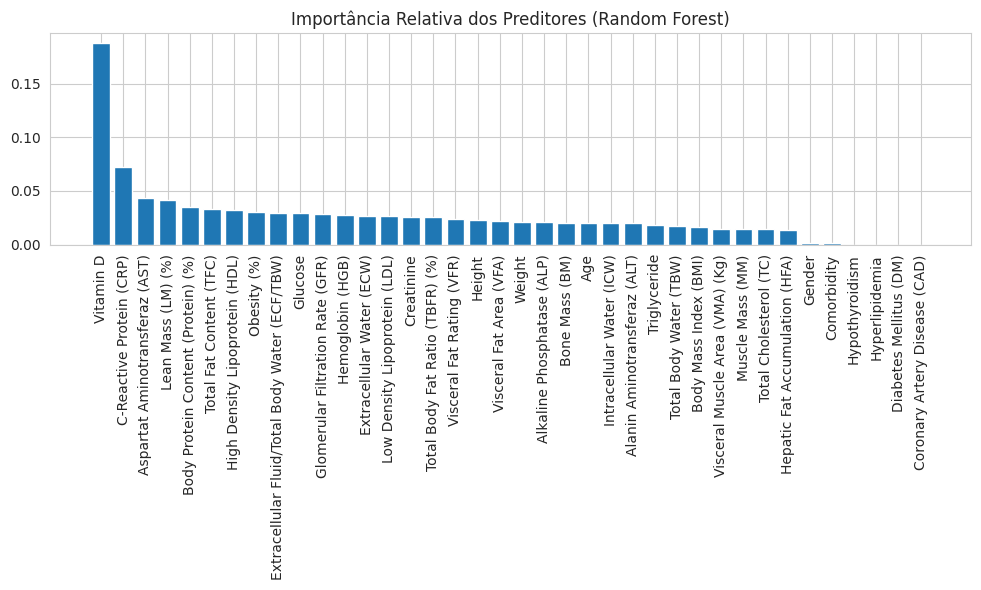

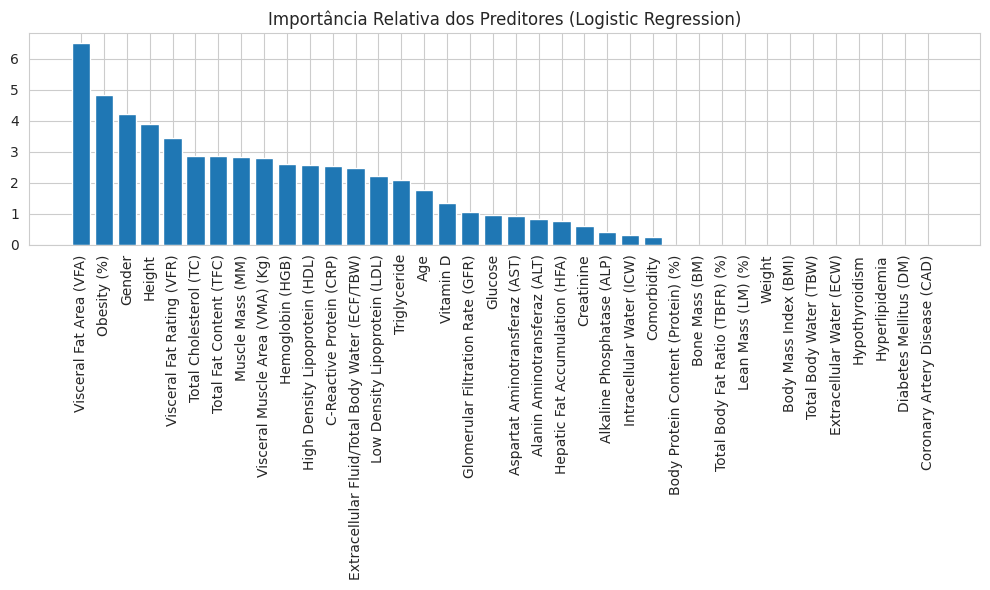

In [24]:
# Importância relativa
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualização (Painel A)
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Importância Relativa dos Preditores (Random Forest)")
plt.tight_layout()
plt.show()

# Importância relativa (magnitude dos coeficientes)
importances = np.abs(best_log_reg.coef_[0])  # Para classificação binária
indices = np.argsort(importances)[::-1]

# Visualização (Painel B)
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Importância Relativa dos Preditores (Logistic Regression)")
plt.tight_layout()
plt.show()

In [25]:
# @title Avaliação

if 'df' in locals():
    models = {'Regressão Logística': best_log_reg, 'Random Forest': best_rf}
    results = []

    for name, model in models.items():
        # Fazer predições no conjunto de teste
        y_pred = model.predict(X_test_scaled)

        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append([name, accuracy, precision, recall, f1])

    # Criar DataFrame com os resultados
    results_df = pd.DataFrame(results, columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score'])

    print("Tabela Comparativa de Desempenho no Conjunto de Teste:")
    display(results_df.round(4))

Tabela Comparativa de Desempenho no Conjunto de Teste:


,Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,0.7857,0.7143,0.8333,0.7692
1,Random Forest,0.8571,0.9000,0.7500,0.8182


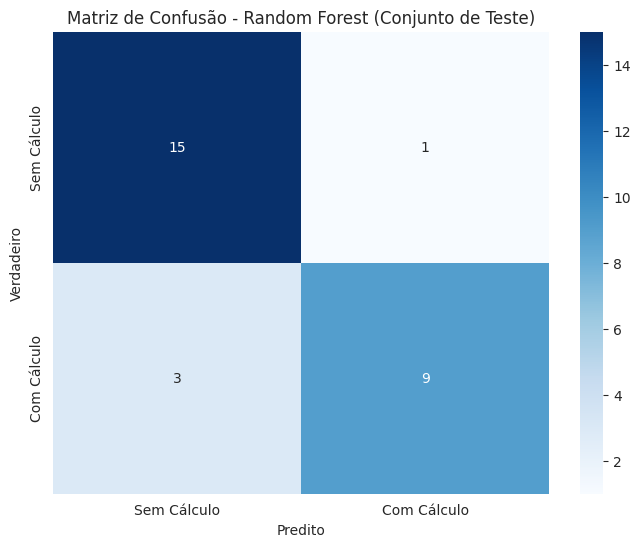

Verdadeiros Negativos (TN): 15 - Pacientes sem cálculo corretamente classificados.
Falsos Positivos (FP): 1 - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.
Falsos Negativos (FN): 3 - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)
Verdadeiros Positivos (TP): 9 - Pacientes com cálculo corretamente classificados.


In [26]:
# @title Matriz de Confusão (RF)
if 'df' in locals():
    y_pred_rf = best_rf.predict(X_test_scaled)
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Sem Cálculo', 'Com Cálculo'],
                yticklabels=['Sem Cálculo', 'Com Cálculo'])
    plt.title('Matriz de Confusão - Random Forest (Conjunto de Teste)')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.savefig(f'{dir_figures}/confusion_matrix_rf.png', bbox_inches='tight', dpi=300)
    plt.show()

    # Extraindo os valores da matriz de confusão
    tn, fp, fn, tp = cm_rf.ravel()
    print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
    print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
    print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
    print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")

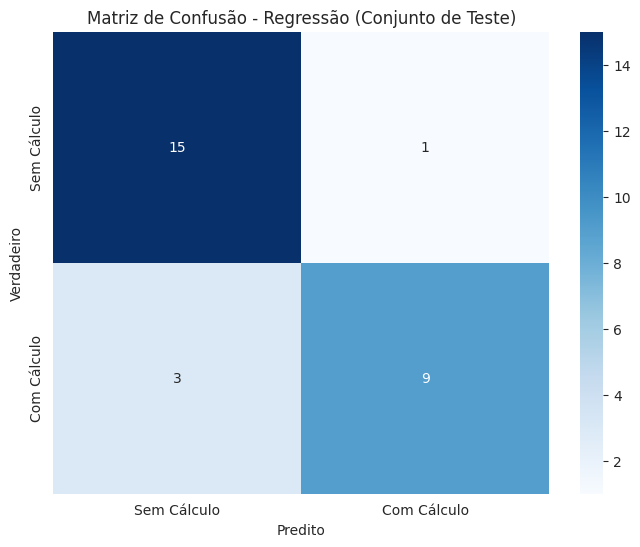

Verdadeiros Negativos (TN): 15 - Pacientes sem cálculo corretamente classificados.
Falsos Positivos (FP): 1 - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.
Falsos Negativos (FN): 3 - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)
Verdadeiros Positivos (TP): 9 - Pacientes com cálculo corretamente classificados.


In [27]:
# @title Matriz de Confusão (LR)
if 'df' in locals():
    y_pred_lr = best_log_reg.predict(X_test_scaled)
    cm_lr = confusion_matrix(y_test, y_pred_rf)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Sem Cálculo', 'Com Cálculo'],
                yticklabels=['Sem Cálculo', 'Com Cálculo'])
    plt.title('Matriz de Confusão - Regressão (Conjunto de Teste)')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.savefig(f'{dir_figures}/confusion_matrix_lr.png', bbox_inches='tight', dpi=300)
    plt.show()

    # Extraindo os valores da matriz de confusão
    tn, fp, fn, tp = cm_lr.ravel()
    print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
    print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
    print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
    print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")